In [32]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
data = pd.read_csv('../data/processed/fully_integrated_data.csv')
data.columns

Index(['raceId', 'season', 'raceNumber', 'circuitId', 'prixName', 'raceDate',
       'driverId', 'constructorId', 'driverStartGridPos', 'driverFinalGridPos',
       'driverFinalRank', 'driverRacePoints', 'driverLapCount',
       'driverFatestLapNumber', 'driverFastestLapTime',
       'driverFastestLapSpeed', 'constructorName', 'constructorNationality',
       'constructorChampionshipStandingPoints',
       'constructorChampionshipStandingPosition',
       'constructorChampionshipStandingWins', 'constructorRacePoints',
       'driverDateOfBirth', 'driverNationality',
       'driverChampionshipStandingPoints',
       'driverChampionshipStandingPosition', 'driverChampionshipStandingWins',
       'circuitName', 'circuitLocation', 'circuitCountry', 'lat', 'lng', 'alt',
       'driverRaceResultStatus', 'driverName', 'driverAge', 'race_time'],
      dtype='object')

### Average Race Points

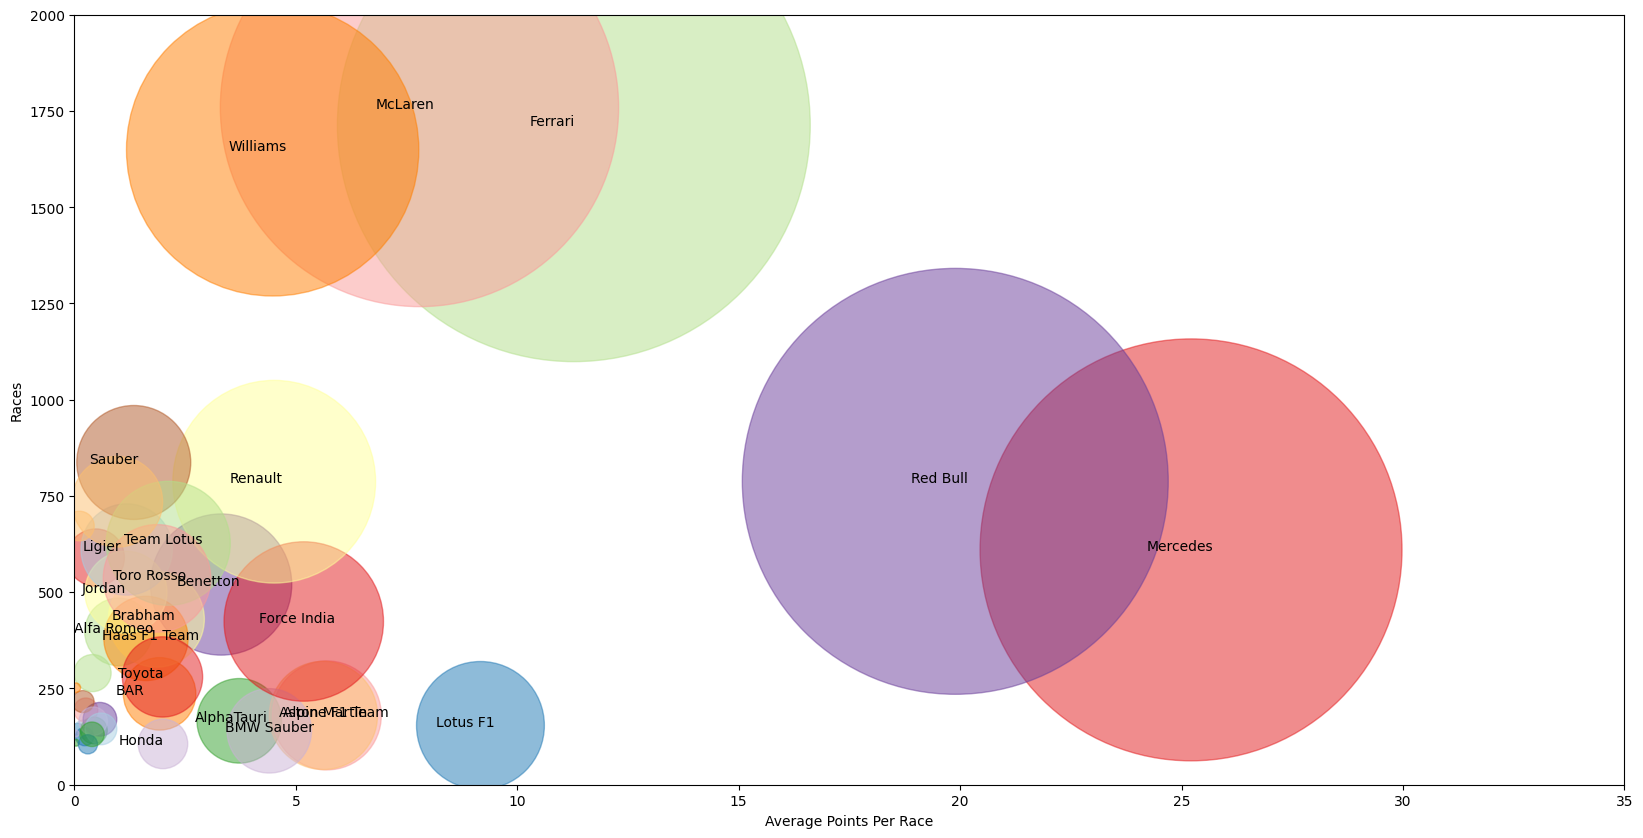

In [40]:
data = data[data.season > 1950]

# Aggregate total points and average points per race
avg_pts = data[['constructorName','constructorRacePoints']].groupby("constructorName").mean()
total_pts = data[['constructorName','constructorRacePoints']].groupby("constructorName").sum()
n = data[['constructorName','raceId']].groupby("constructorName").count()
num_races = n[n.raceId > 100]
d = pd.merge(avg_pts, total_pts, on='constructorName')
md = pd.merge(d, num_races, on='constructorName')
md = md.reset_index()

plt.figure(figsize=(20, 10))
plt.scatter(md.constructorRacePoints_x, md.raceId, s=md.constructorRacePoints_y*6, alpha=0.5, color=sns.color_palette("Paired", len(md)))
plt.xlim(0, 35)
plt.ylim(0, 2000)

plt.xlabel("Average Points Per Race")
plt.ylabel("Races")

for x, y, z in zip(md.constructorRacePoints_x, md.raceId, md.constructorName):
  plt.annotate(z, xy=(x-1,y-1))

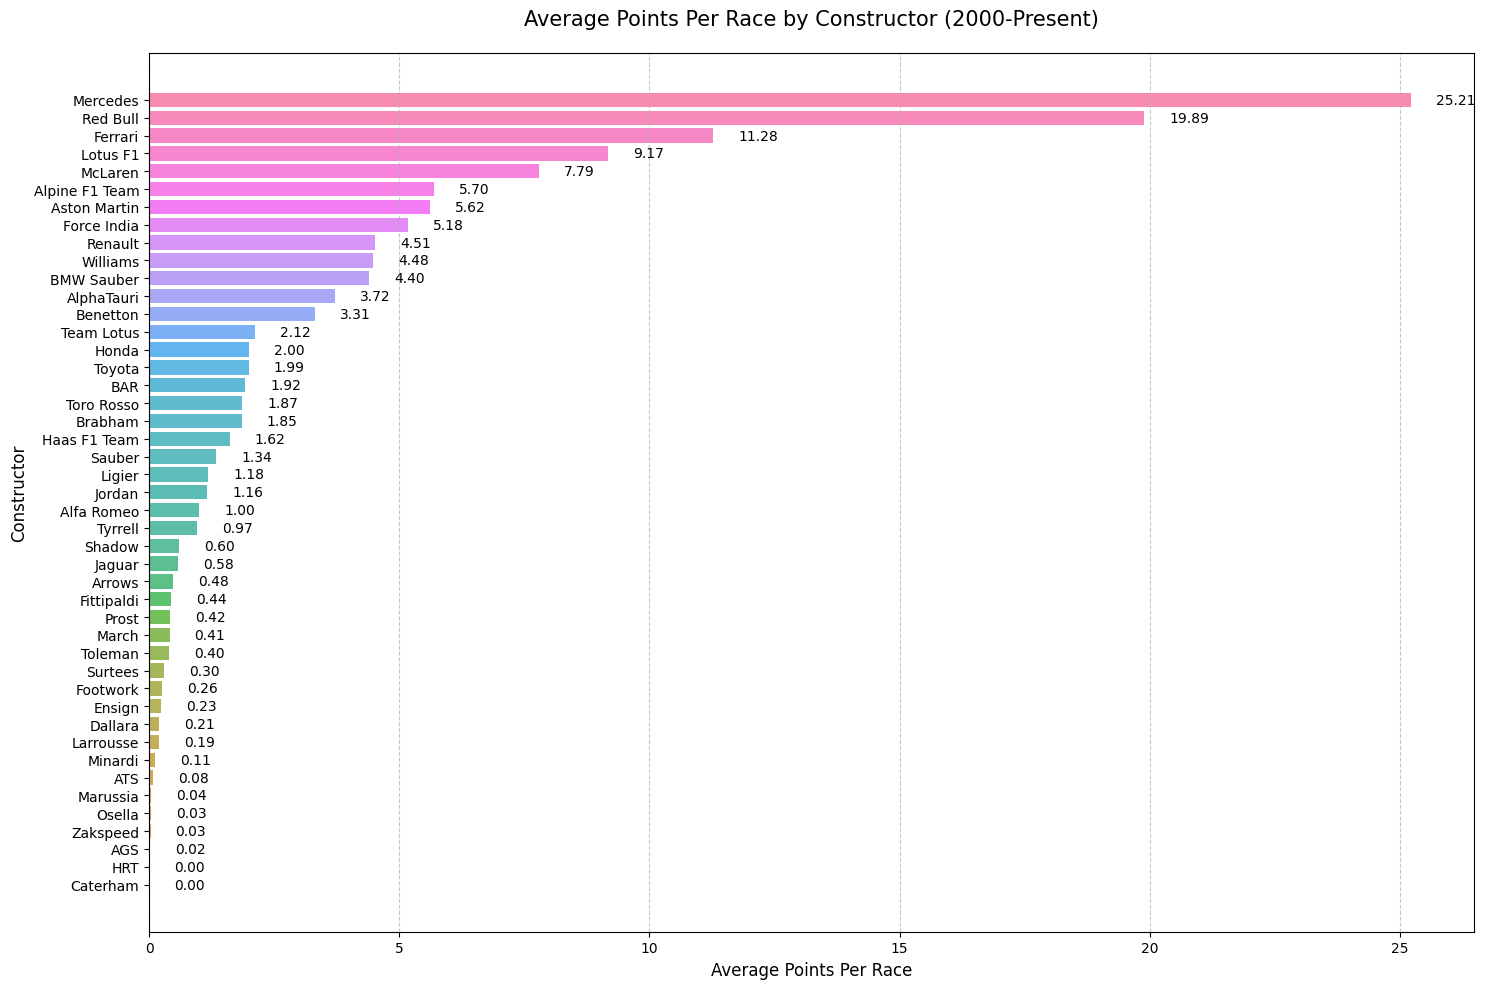


Constructor Performance Statistics:
constructorName  constructorRacePoints_x
       Caterham                 0.000000
            HRT                 0.000000
            AGS                 0.024390
       Zakspeed                 0.030075
         Osella                 0.031746
       Marussia                 0.036697
            ATS                 0.075862
        Minardi                 0.113095
      Larrousse                 0.194444
        Dallara                 0.208333
         Ensign                 0.232000
       Footwork                 0.257732
        Surtees                 0.304762
        Toleman                 0.396947
          March                 0.410345
          Prost                 0.424242
     Fittipaldi                 0.439716
         Arrows                 0.481356
         Jaguar                 0.576471
         Shadow                 0.600000
        Tyrrell                 0.967347
     Alfa Romeo                 0.997481
         Jordan     

In [35]:

data = data[data.season > 1975]

# Aggregate data
avg_pts = data[['constructorName','constructorRacePoints']].groupby("constructorName").mean()
total_pts = data[['constructorName','constructorRacePoints']].groupby("constructorName").sum()
n = data[['constructorName','raceId']].groupby("constructorName").count()
num_races = n[n.raceId > 100]
d = pd.merge(avg_pts, total_pts, on='constructorName')
md = pd.merge(d, num_races, on='constructorName')
md = md.reset_index()

# Sort values
md_sorted = md.sort_values('constructorRacePoints_x', ascending=True)

plt.figure(figsize=(15, 10))

bars = plt.barh(md_sorted['constructorName'], 
                md_sorted['constructorRacePoints_x'],
                alpha=0.8,
                color=sns.color_palette("husl", len(md)))

# Customize plot
plt.title('Average Points Per Race by Constructor (2000-Present)', 
          fontsize=15, pad=20)
plt.xlabel('Average Points Per Race', fontsize=12)
plt.ylabel('Constructor', fontsize=12)

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5,  
             bar.get_y() + bar.get_height()/2,
             f'{width:.2f}',
             va='center',
             ha='left',
             fontsize=10)

plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

print("\nConstructor Performance Statistics:")
print(md_sorted[['constructorName', 'constructorRacePoints_x']].to_string(index=False))

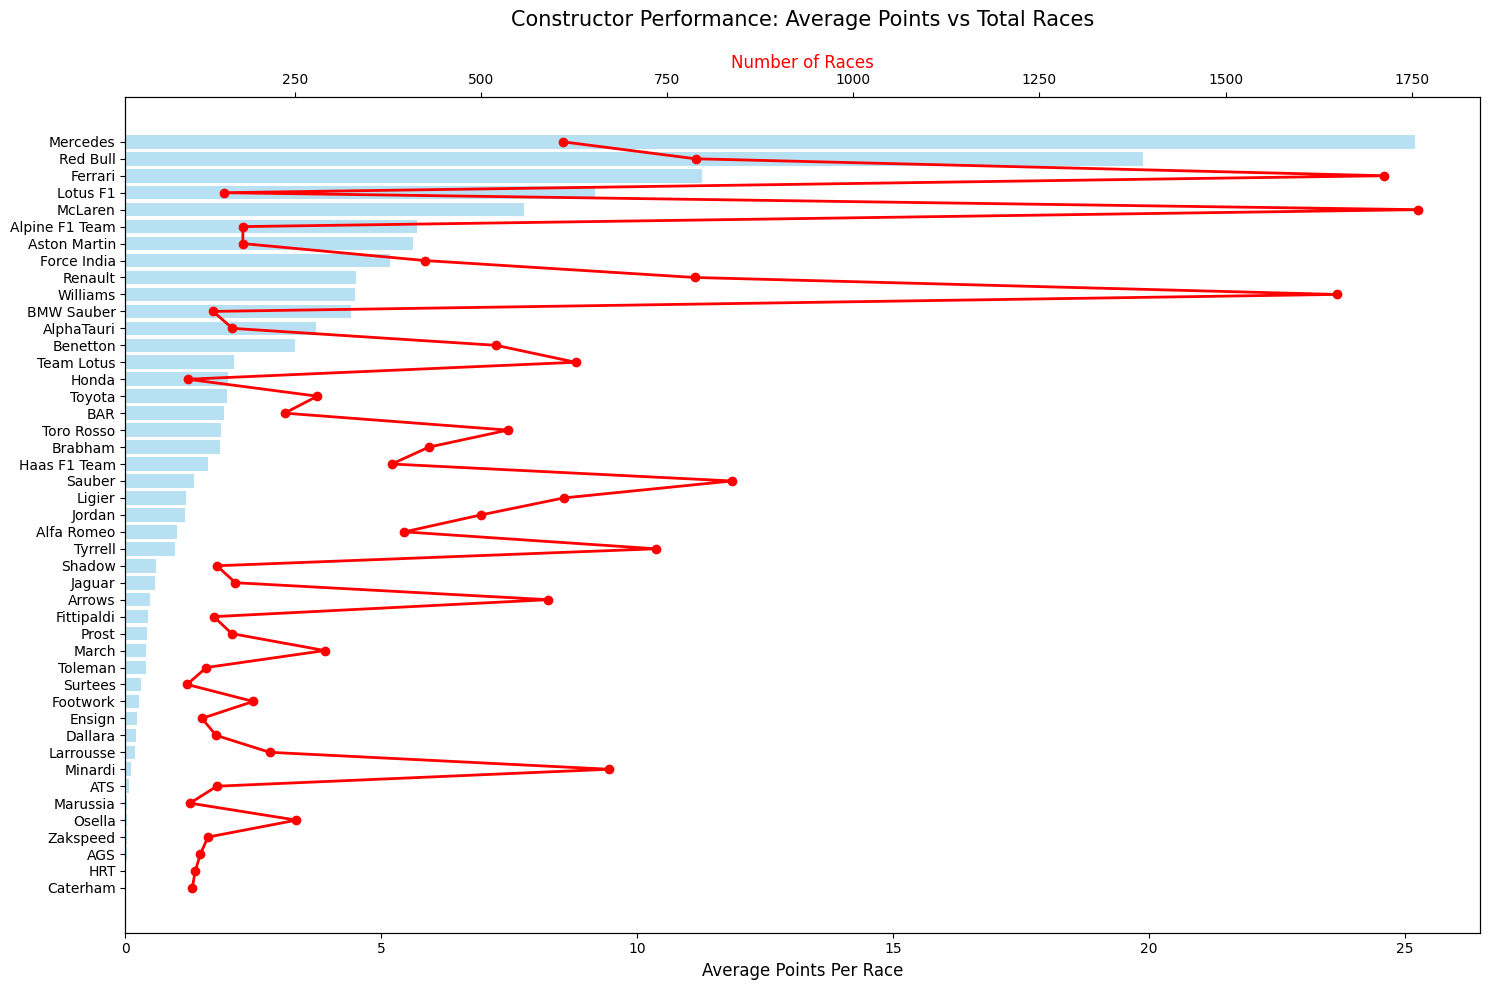

In [36]:
fig, ax1 = plt.subplots(figsize=(15, 10))

# Bar plot for average points
bars = ax1.barh(md_sorted['constructorName'], 
                md_sorted['constructorRacePoints_x'],
                alpha=0.6,
                color='skyblue')

# Create second y-axis for number of races
ax2 = ax1.twiny()
ax2.plot(md_sorted['raceId'], md_sorted['constructorName'], 
         color='red', marker='o', linestyle='-', linewidth=2)

# Customize plot
ax1.set_title('Constructor Performance: Average Points vs Total Races', fontsize=15, pad=20)
ax1.set_xlabel('Average Points Per Race', fontsize=12)
ax2.set_xlabel('Number of Races', fontsize=12, color='red')

plt.tight_layout()
plt.show()

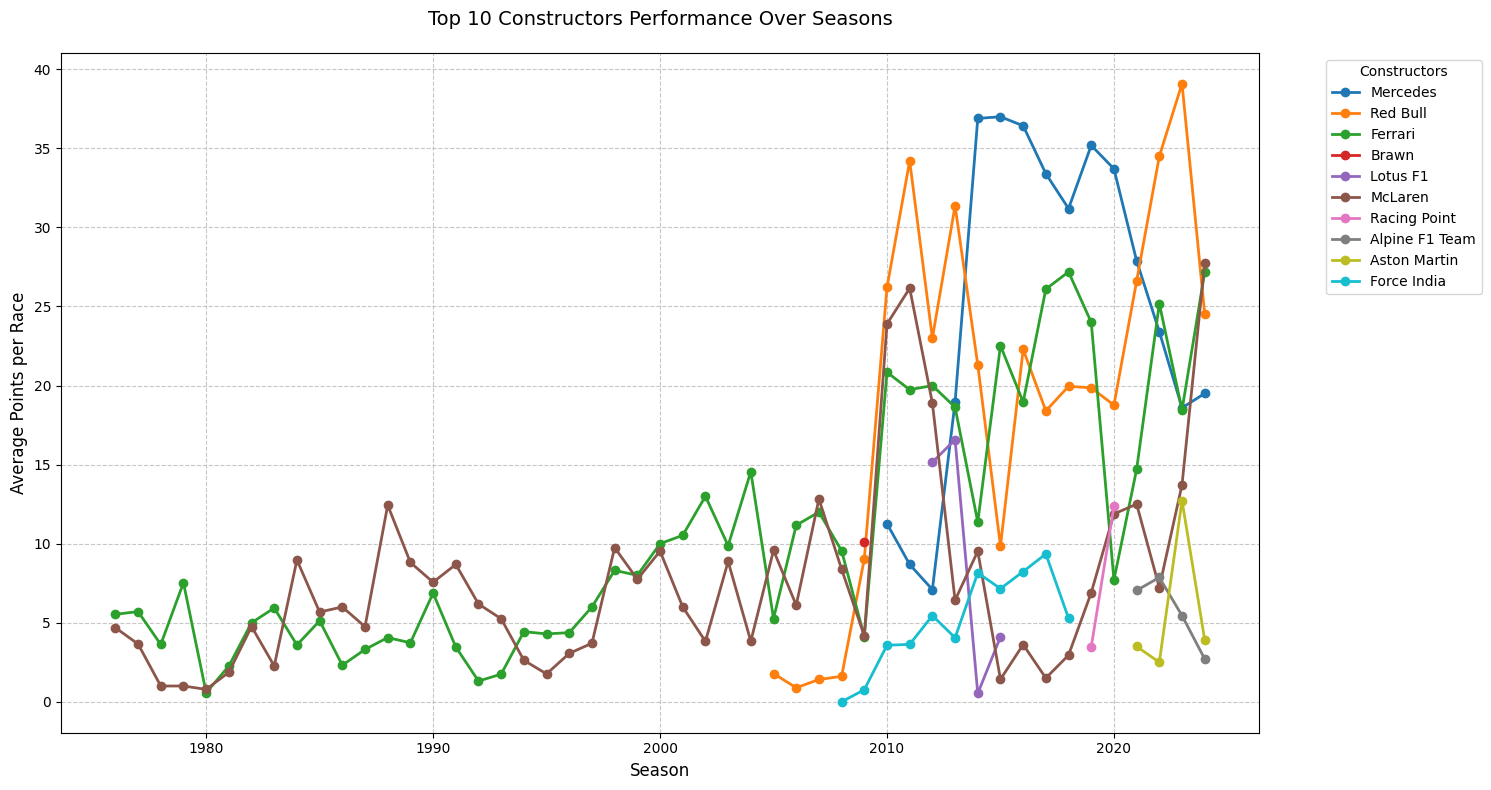


Top 10 Constructors by Average Points:
                 Avg Points
constructorName            
Mercedes              25.21
Red Bull              19.89
Ferrari               11.28
Brawn                 10.12
Lotus F1               9.17
McLaren                7.79
Racing Point           7.45
Alpine F1 Team         5.70
Aston Martin           5.62
Force India            5.18


In [37]:
top_constructors = (data.groupby('constructorName')['constructorRacePoints']
                   .mean()
                   .sort_values(ascending=False)
                   .head(10)
                   .index)

season_avg = (data[data['constructorName'].isin(top_constructors)]
             .groupby(['season', 'constructorName'])['constructorRacePoints']
             .mean()
             .reset_index())

plt.figure(figsize=(15, 8))

for constructor in top_constructors:
    constructor_data = season_avg[season_avg['constructorName'] == constructor]
    plt.plot(constructor_data['season'], 
             constructor_data['constructorRacePoints'],
             marker='o',
             linewidth=2,
             markersize=6,
             label=constructor)

plt.title('Top 10 Constructors Performance Over Seasons', fontsize=14, pad=20)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Average Points per Race', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), 
          loc='upper left',
          fontsize=10,
          title='Constructors')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("\nTop 10 Constructors by Average Points:")
avg_points = data.groupby('constructorName')['constructorRacePoints'].mean().sort_values(ascending=False).head(10)
print(avg_points.to_frame('Avg Points').round(2))

### correlation matrix using a heatmap

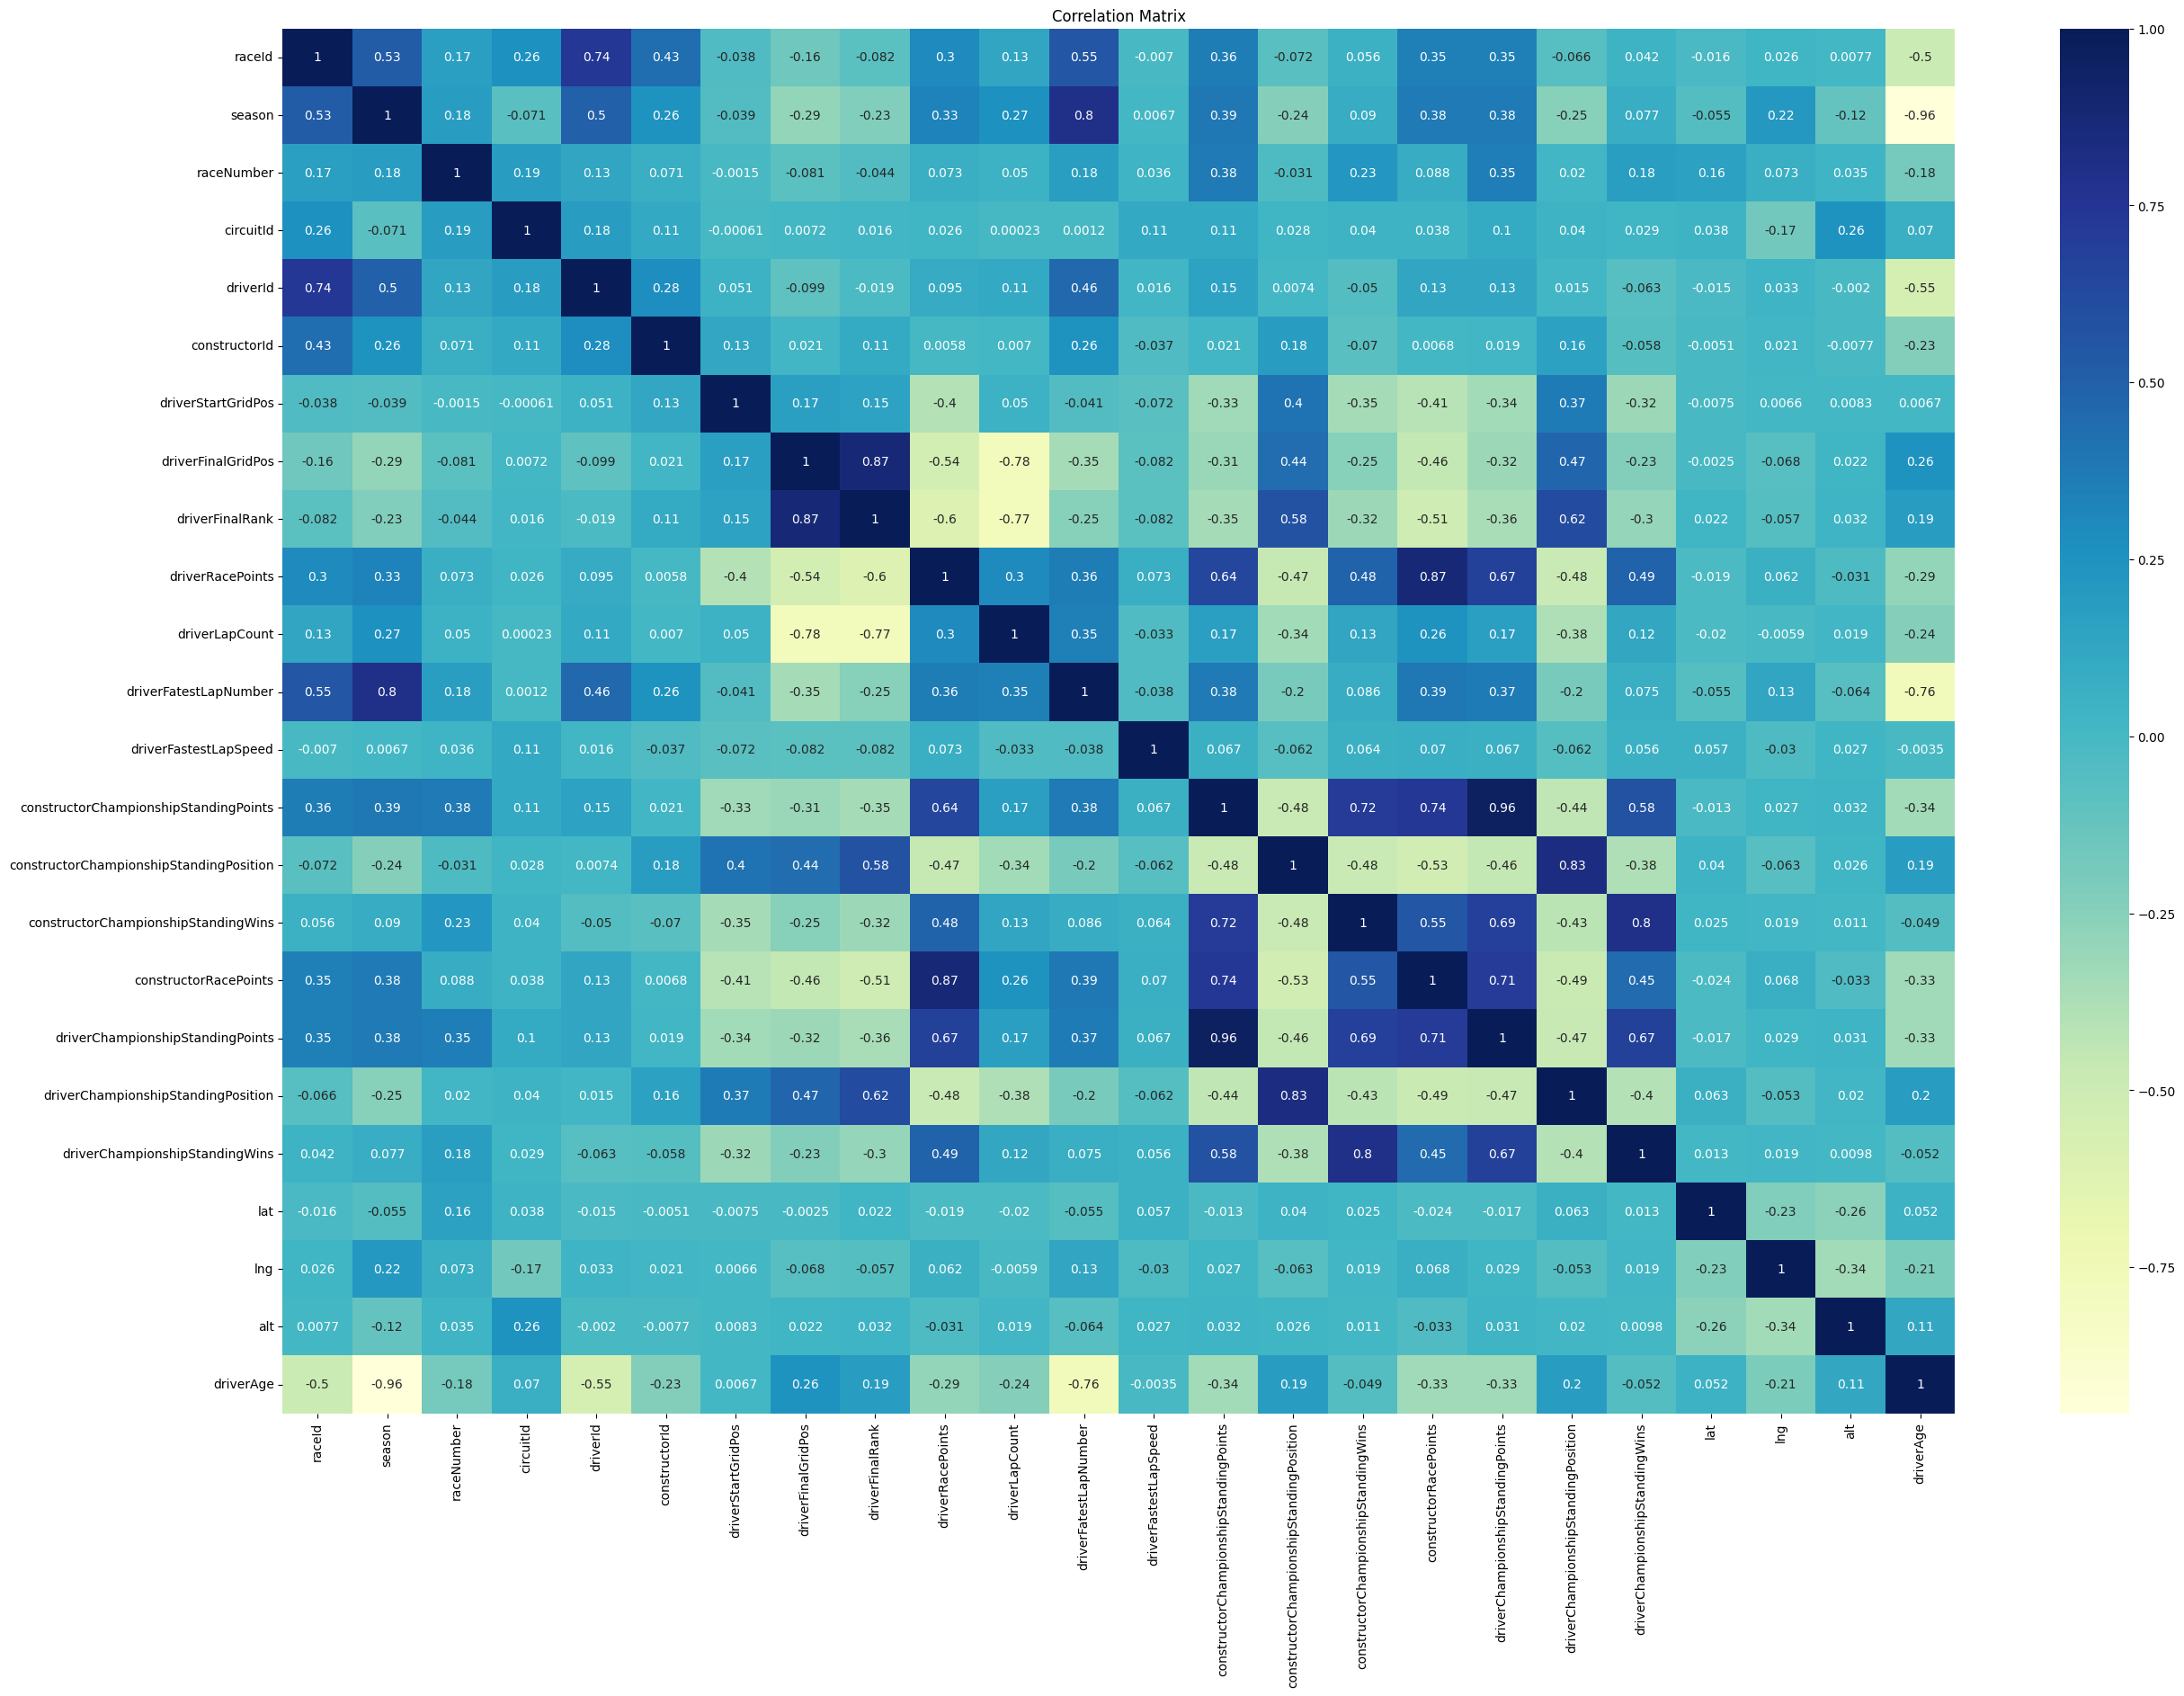

In [38]:
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
corr = data[numeric_cols].corr()

fig, ax = plt.subplots(figsize=(30,20))         
sns.heatmap(corr, annot=True, ax=ax, cmap="YlGnBu")

plt.title('Correlation Matrix')
plt.show()

### Constructor Performance by season

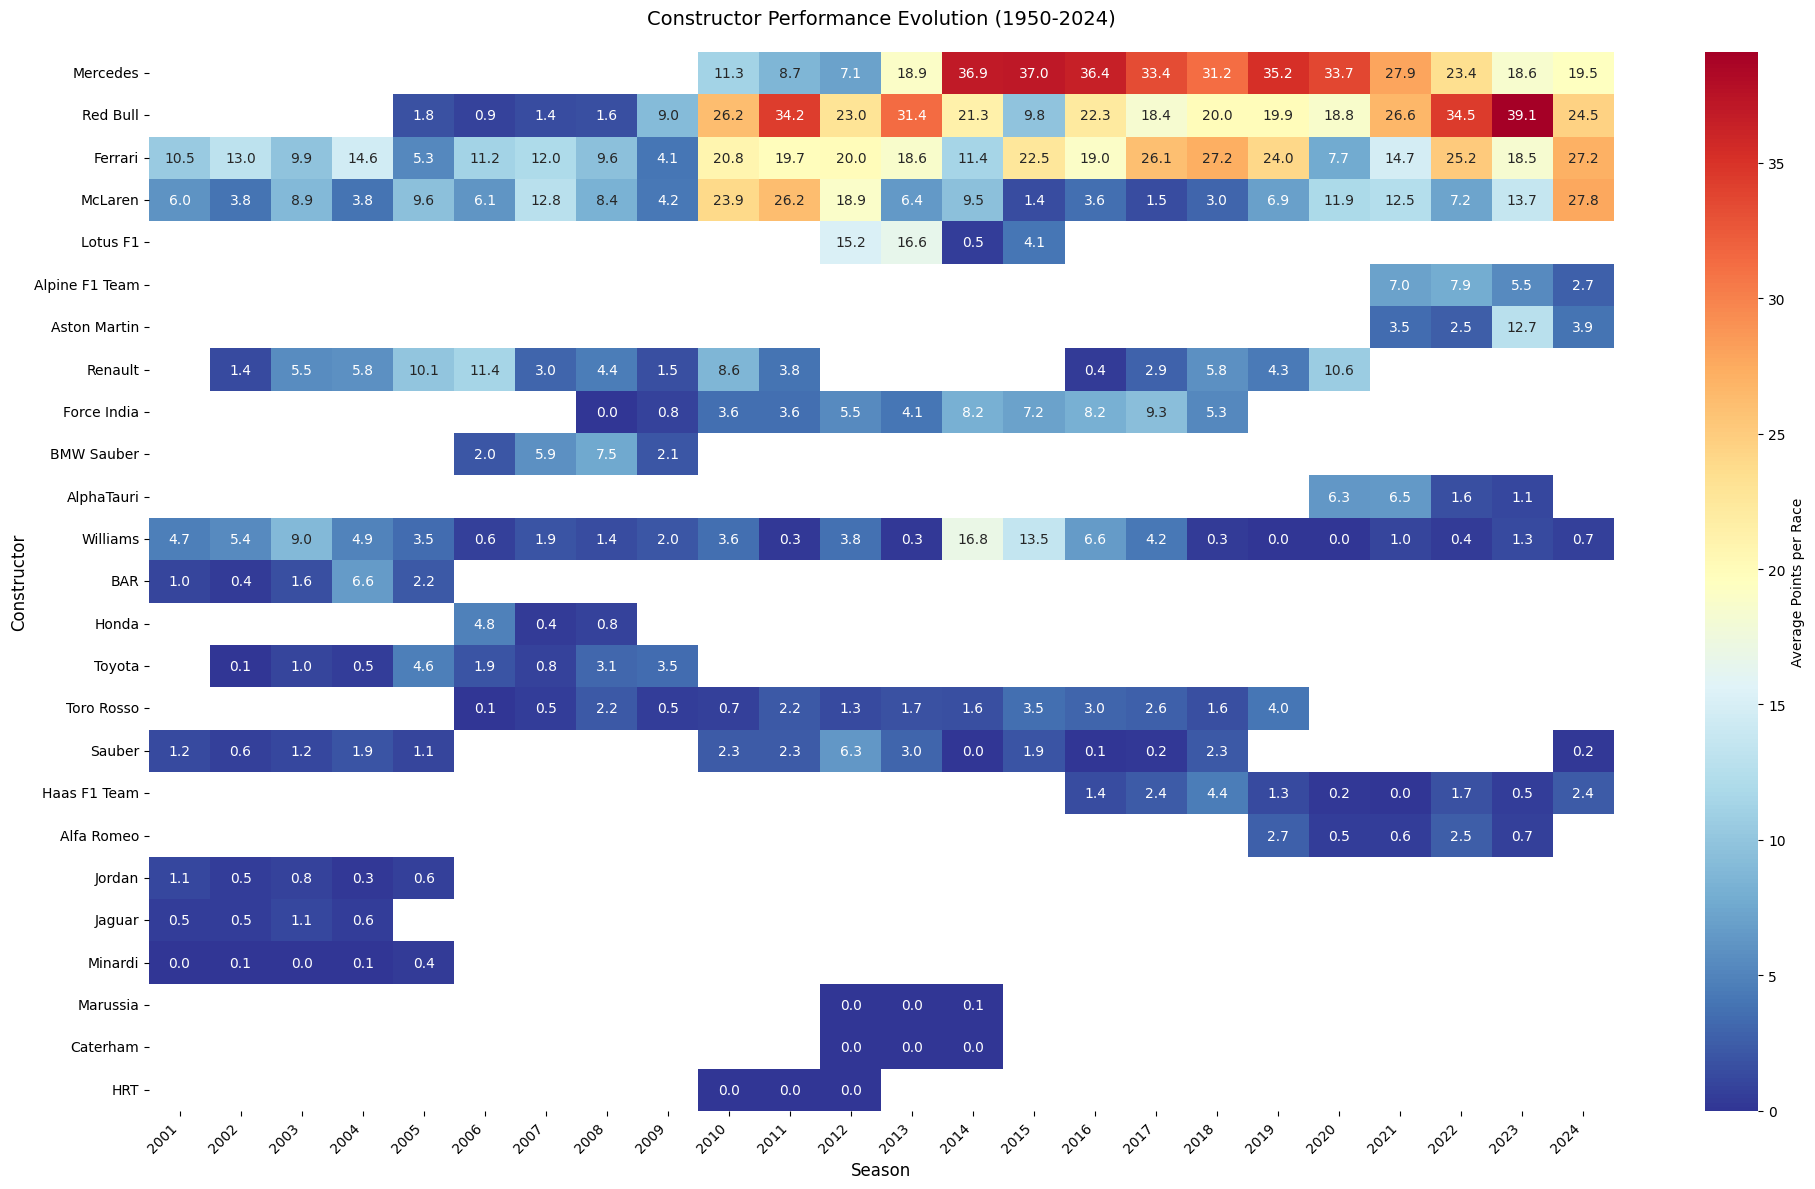

In [ ]:
data = data[data.season > 2000]
# Filter constructors with significant presence (minimum number of races)
significant_constructors = data.groupby('constructorName')['raceId'].count()
min_races = 100  # Adjust this threshold as needed
major_constructors = significant_constructors[significant_constructors >= min_races].index

# Create heatmap data for major constructors
heatmap_data = data[data['constructorName'].isin(major_constructors)].pivot_table(
    values='constructorRacePoints',
    index='constructorName',
    columns='season',
    aggfunc='mean'
)

# Sort constructors by their average performance
constructor_avg = heatmap_data.mean(axis=1).sort_values(ascending=False)
heatmap_data = heatmap_data.loc[constructor_avg.index]

# Create the heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(heatmap_data, 
            cmap='RdYlBu_r',
            annot=True, 
            fmt='.1f',
            cbar_kws={'label': 'Average Points per Race'},
            mask=heatmap_data.isna())

plt.title('Constructor Performance Evolution (2020-2024)', pad=20, size=14)
plt.xlabel('Season', size=12)
plt.ylabel('Constructor', size=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

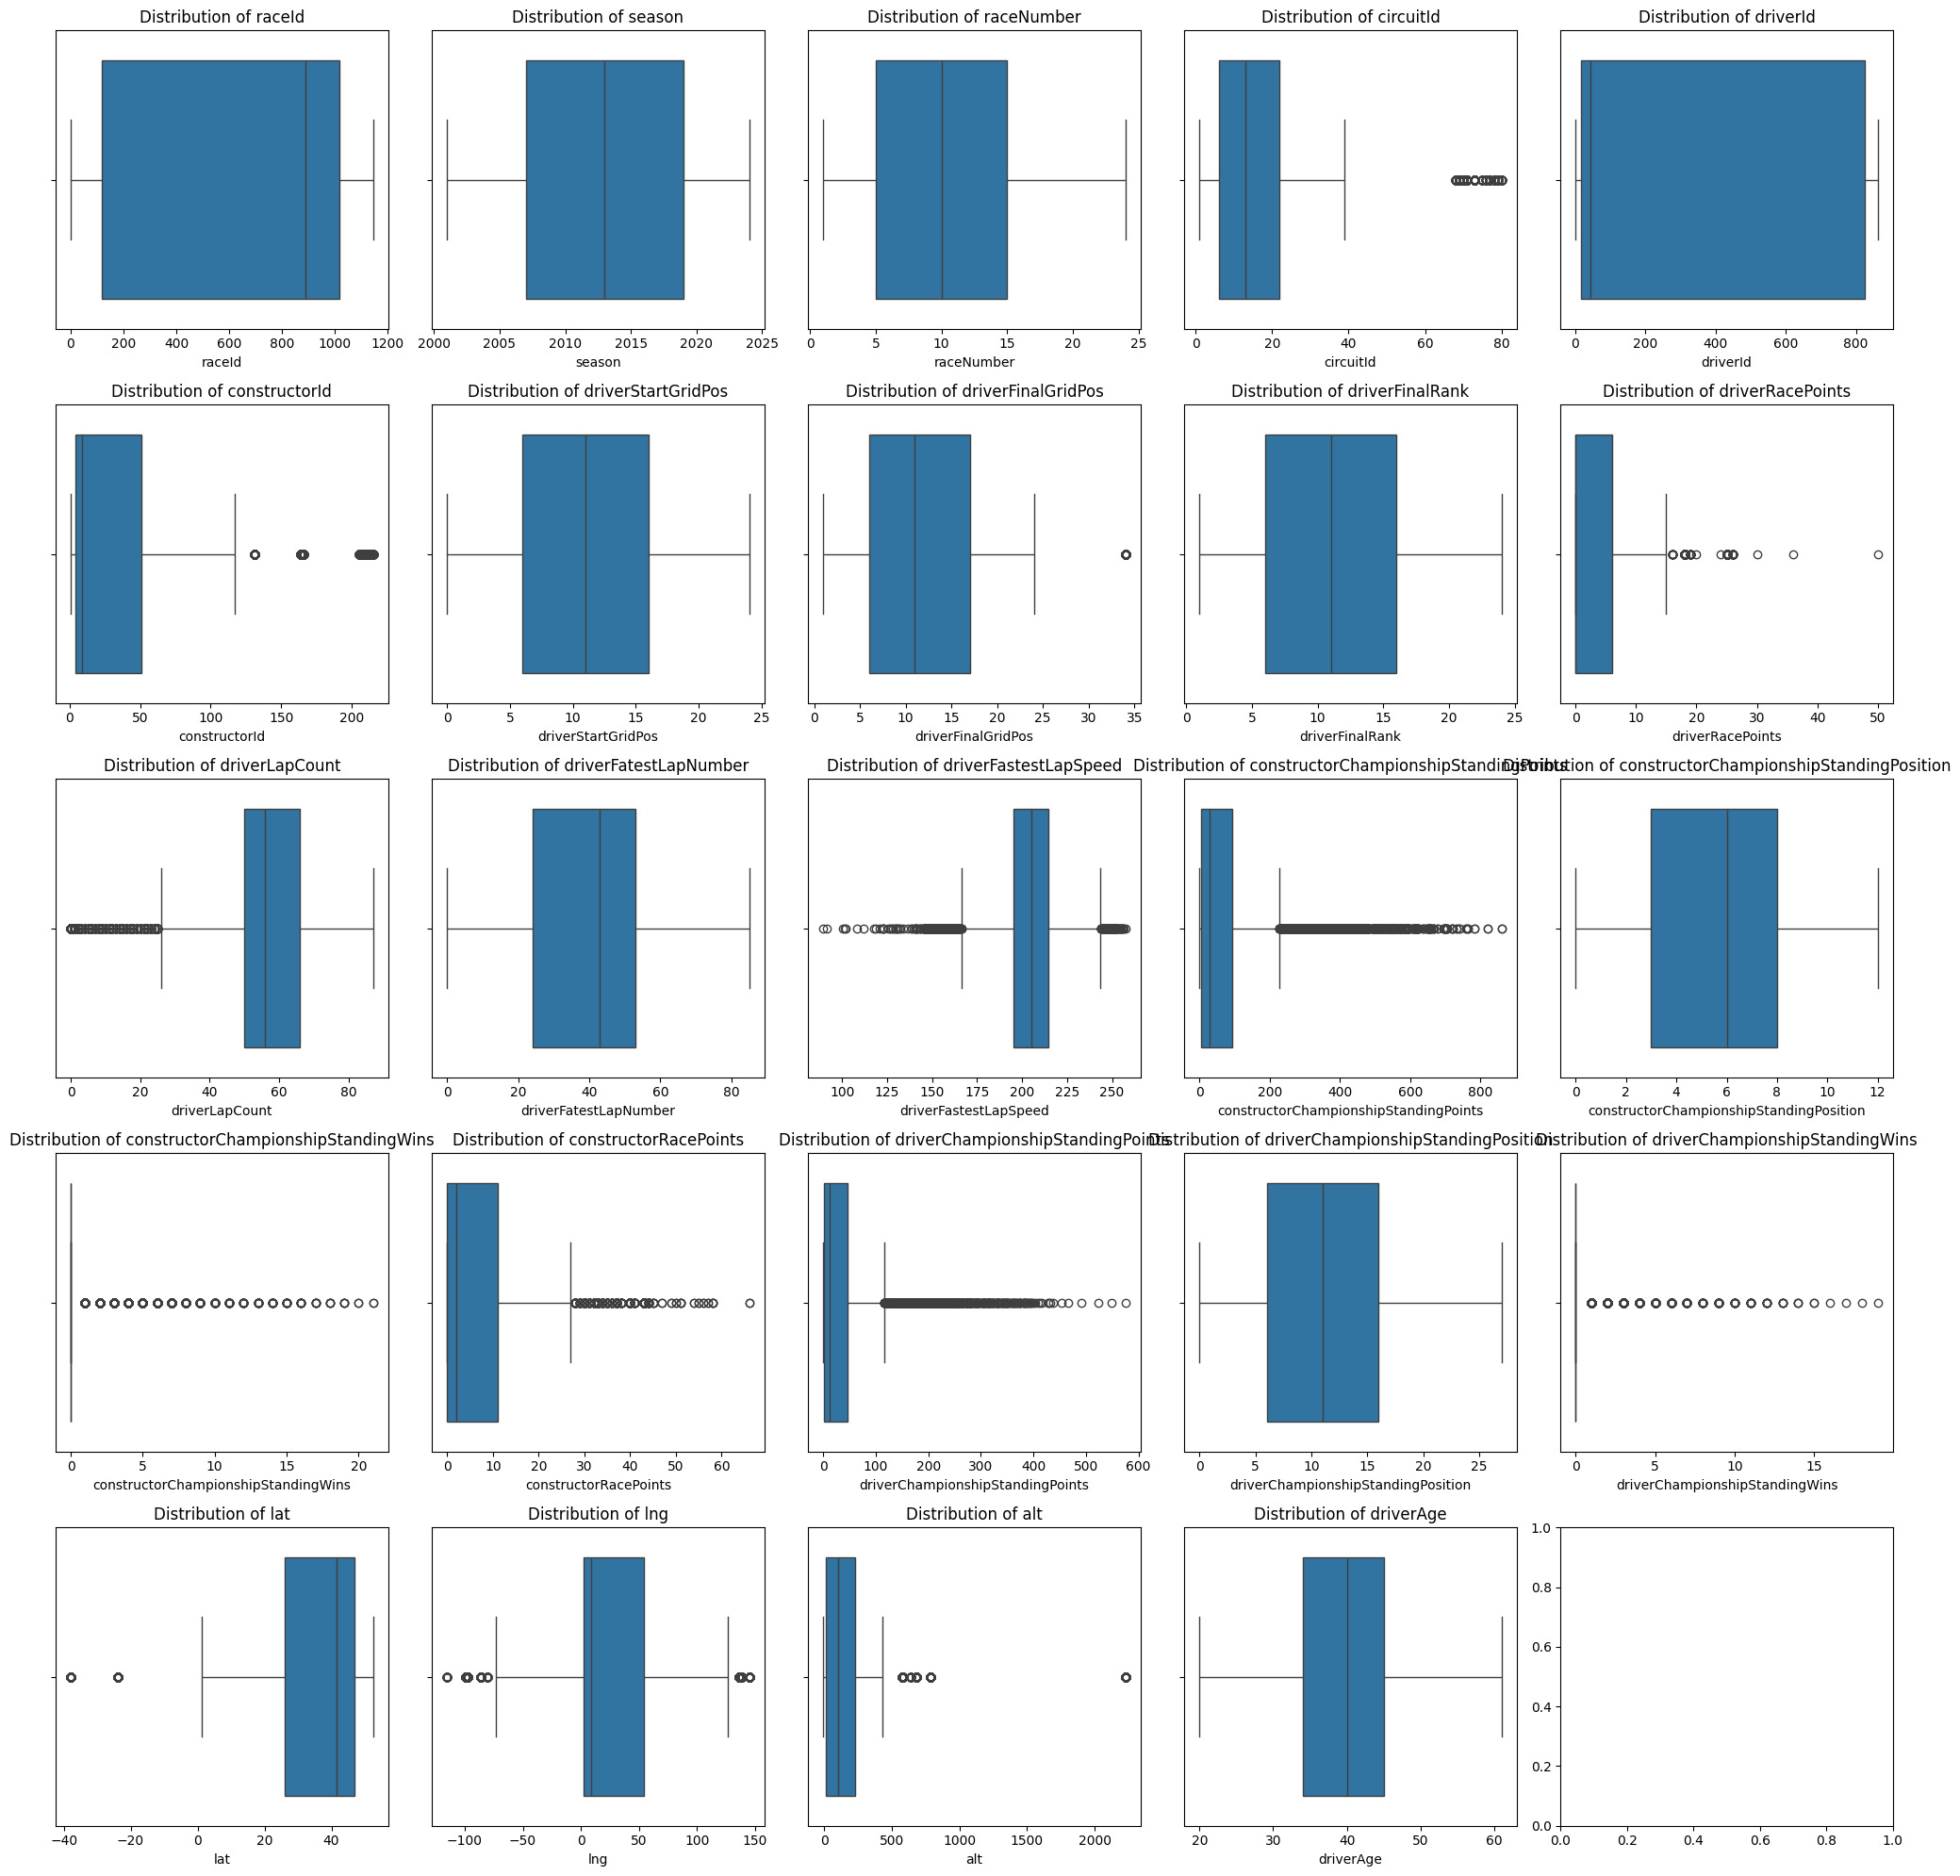

In [ ]:
df = data

num_df = df.select_dtypes(include=['int64', 'float64'])

# Creating a box plot of driver race points
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 20))

# Looping through each numerical column and create a box plot in the corresponding subplot
for i, column in enumerate(num_df.columns):
    row = i // 5
    col = i % 5
    ax = axes[row][col]
    sns.boxplot(x=num_df[column], ax=ax)
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)

fig.tight_layout()
plt.show()

### Numerical Data DIstribution

In [48]:
list(set(df.dtypes.tolist()))

[dtype('float64'), dtype('O'), dtype('int64')]

In [49]:
df_num = df.select_dtypes(include = ['float64', 'int64', 'int32'])
df_num.head()

raceId  season  raceNumber  circuitId  driverId  constructorId  \
0       1    2009           1          1        18             23   
1       1    2009           1          1        22             23   
2       1    2009           1          1        15              7   
3       1    2009           1          1        10              7   
4       1    2009           1          1         4              4   

   driverStartGridPos  driverFinalGridPos  driverFinalRank  driverRacePoints  \
0                   1                 1.0                1              10.0   
1                   2                 2.0                2               8.0   
2                  20                 3.0                3               6.0   
3                  19                 4.0                4               5.0   
4                  10                 5.0                5               4.0   

   ...  constructorChampionshipStandingPosition  \
0  ...                                      1.0   
1  ...                                      1.0   
2  ...                                      2.0   
3  ...                                      2.0   
4  ...                                      3.0   

   constructorChampionshipStandingWins  constructorRacePoints  \
0                                  1.0                   18.0   
1                                  1.0                   18.0   
2                                  0.0                   11.0   
3                                  0.0                   11.0   
4                                  0.0                    4.0   

   driverChampionshipStandingPoints  driverChampionshipStandingPosition  \
0                              10.0                                 1.0   
1                               8.0                                 2.0   
2                               6.0                                 3.0   
3                               5.0                                 4.0   
4                               4.0                                 5.0   

   driverChampionshipStandingWins      lat      lng  alt  driverAge  
0                             1.0 -37.8497  144.968   10       45.0  
1                             0.0 -37.8497  144.968   10       53.0  
2                             0.0 -37.8497  144.968   10       51.0  
3                             0.0 -37.8497  144.968   10       43.0  
4                             0.0 -37.8497  144.968   10       44.0  

[5 rows x 24 columns]

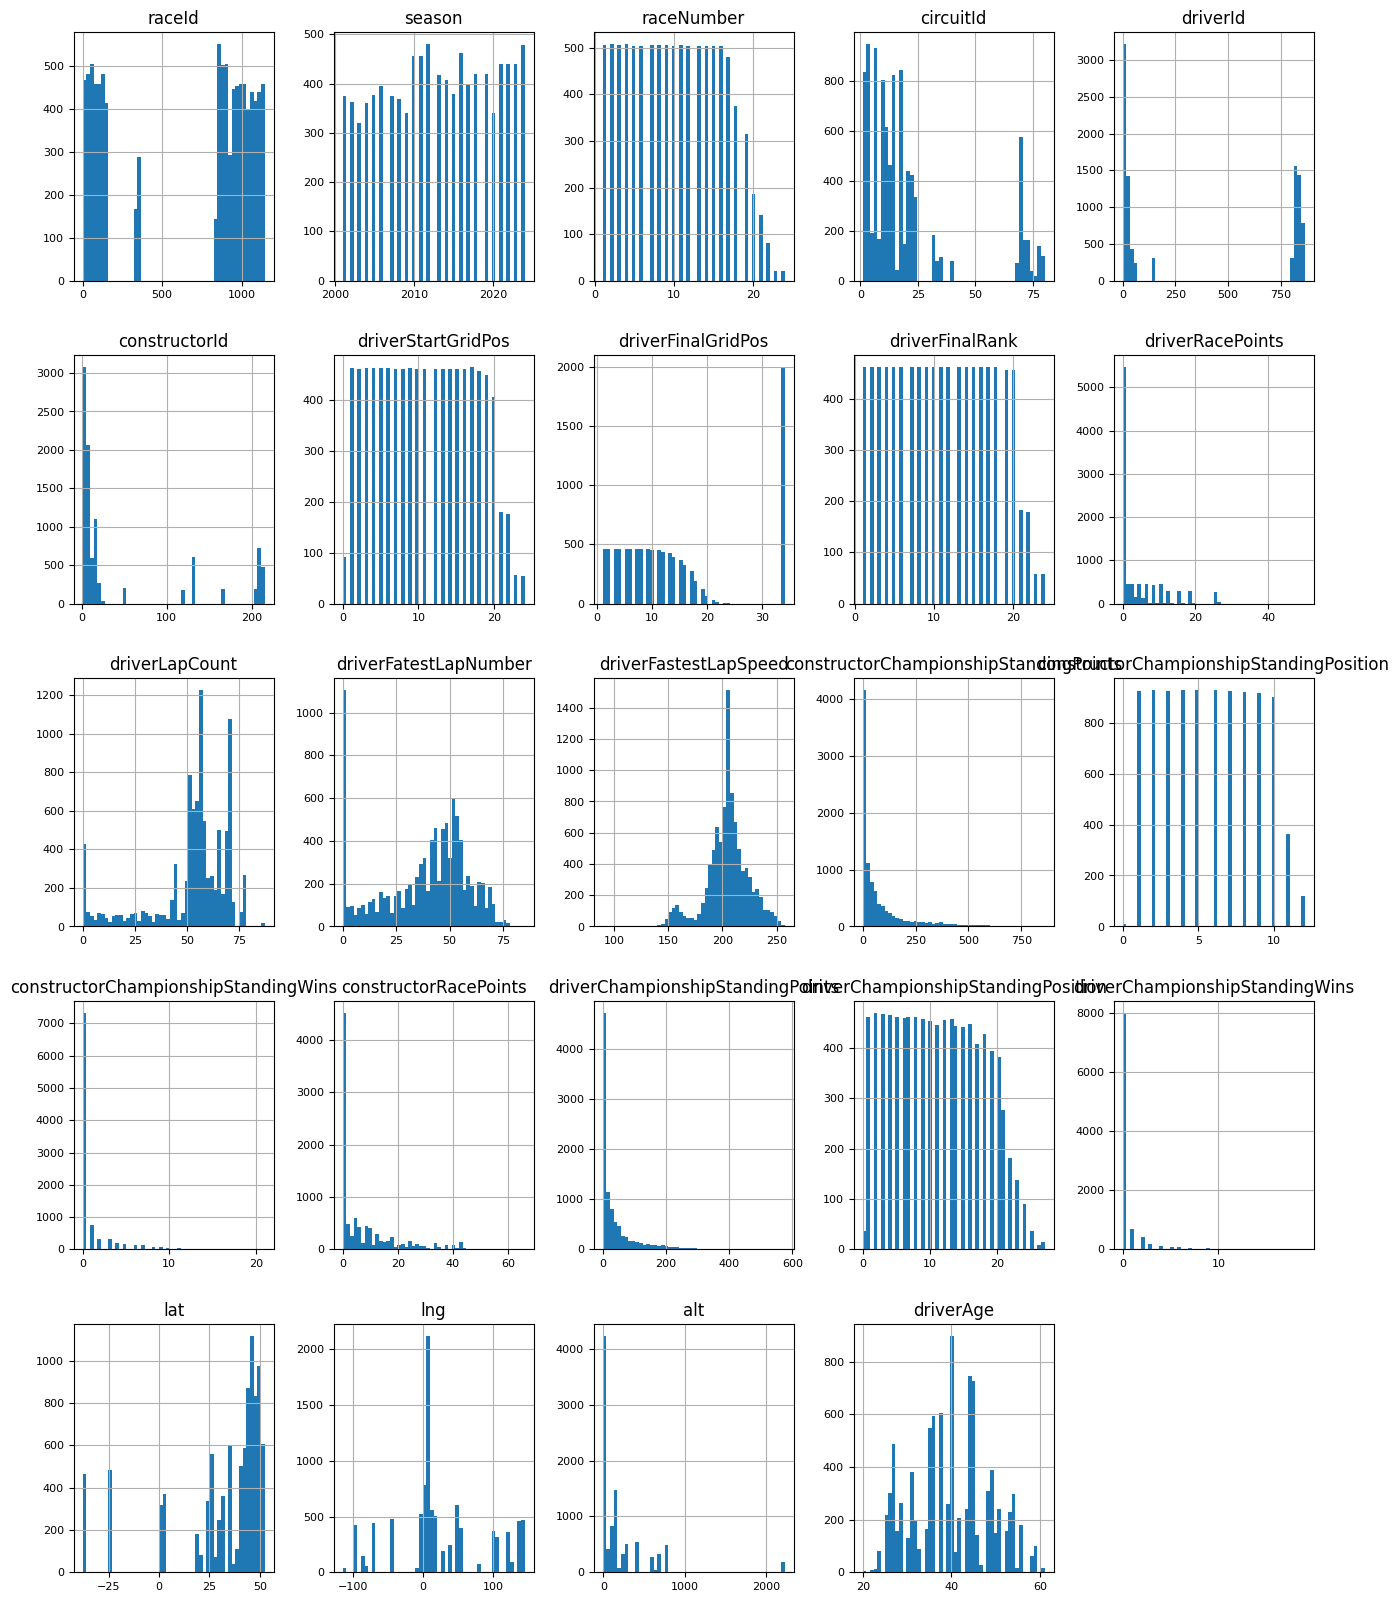

In [ ]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);


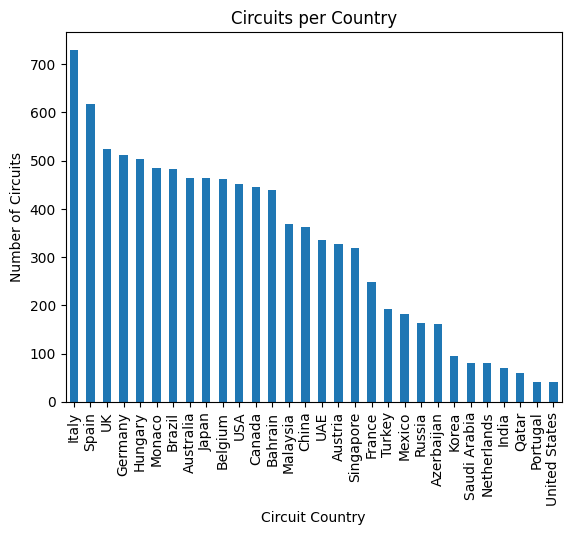

In [51]:
# Create a bar chart of circuitCountry
df['circuitCountry'].value_counts().plot(kind='bar')

plt.xlabel('Circuit Country')
plt.ylabel('Number of Circuits')
plt.title('Circuits per Country')
plt.show()

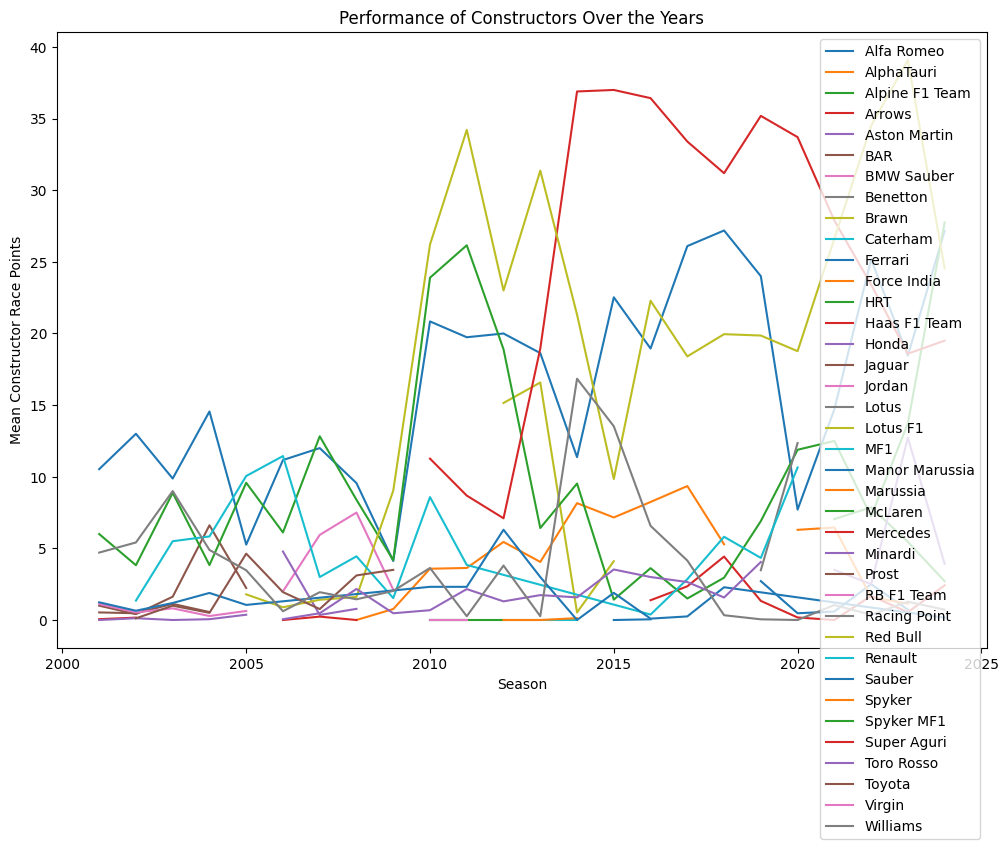

In [52]:

df = data

constructor_performance = df.groupby(['constructorName', 'season'])['constructorRacePoints'].mean().reset_index()

# Loop through each constructor and plot a line chart of their performance over the years
plt.figure(figsize=(12,8))
for constructor in constructor_performance['constructorName'].unique():
    constructor_data = constructor_performance[constructor_performance['constructorName']==constructor]
    plt.plot(constructor_data['season'], constructor_data['constructorRacePoints'], label=constructor)

plt.title('Performance of Constructors Over the Years')
plt.xlabel('Season')
plt.ylabel('Mean Constructor Race Points')

plt.legend(loc='best')
plt.show()

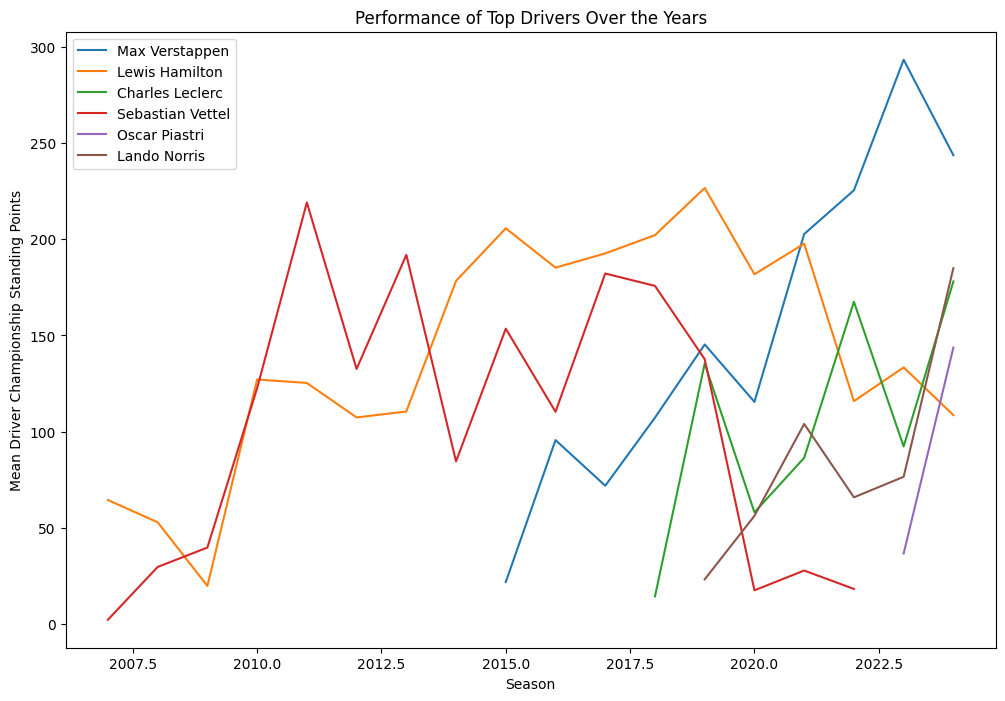

In [53]:
df = data

# Group the data by driverName and season and compute the mean driverChampionshipStandingPoints
driver_performance = df.groupby(['driverName', 'season'])['driverChampionshipStandingPoints'].mean().reset_index()

# Get the top 5 drivers by mean driverChampionshipStandingPoints across all seasons
top_drivers = driver_performance.groupby('driverName')['driverChampionshipStandingPoints'].mean().sort_values(ascending=False)[:6].index

plt.figure(figsize=(12,8))
for driver in top_drivers:
    driver_data = driver_performance[driver_performance['driverName']==driver]
    plt.plot(driver_data['season'], driver_data['driverChampionshipStandingPoints'], label=driver)

plt.title('Performance of Top Drivers Over the Years')
plt.xlabel('Season')
plt.ylabel('Mean Driver Championship Standing Points')

plt.legend(loc='best')

plt.show()

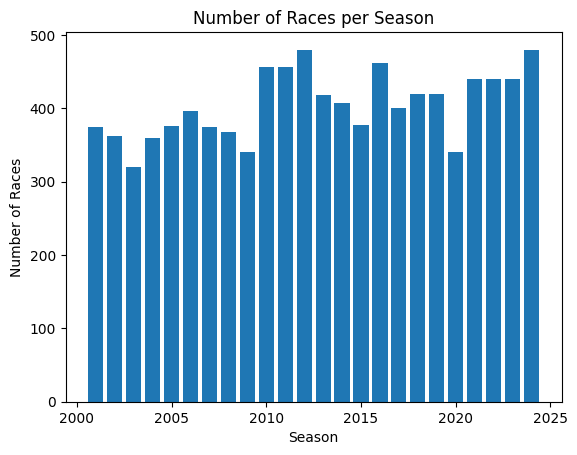

In [54]:
df = data
#Get the count of races by season and sort them by season
season_counts = df['season'].value_counts().sort_index()
#Bar plot of the number of races per season
plt.bar(season_counts.index, season_counts.values)
plt.xlabel('Season')
plt.ylabel('Number of Races')
plt.title('Number of Races per Season')
plt.show()

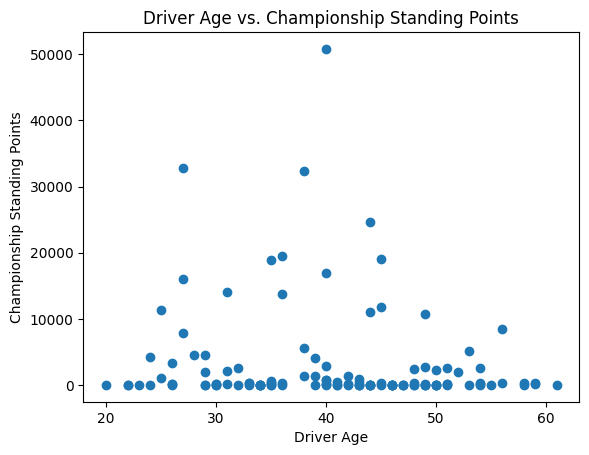

In [55]:

#Grouping the data by driverId and taking the maximum driver age and sum of driver championship standing points
driver_age = df.groupby('driverId')['driverAge'].max()
driver_points = df.groupby('driverId')['driverChampionshipStandingPoints'].sum()
#Creating a scatter plot with driver age on x-axis and championship standing points on y-axis
plt.scatter(driver_age, driver_points)
plt.xlabel('Driver Age')
plt.ylabel('Championship Standing Points')
plt.title('Driver Age vs. Championship Standing Points')
plt.show()

C:\Users\yeshw\AppData\Local\Temp\ipykernel_14284\3583861758.py:8: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  driver_championships = pd.pivot_table(df[df['driverNationality'].isin(driver_nationalities)], index='driverNationality', columns='age_range', values='driverChampionshipStandingPoints', aggfunc='mean')


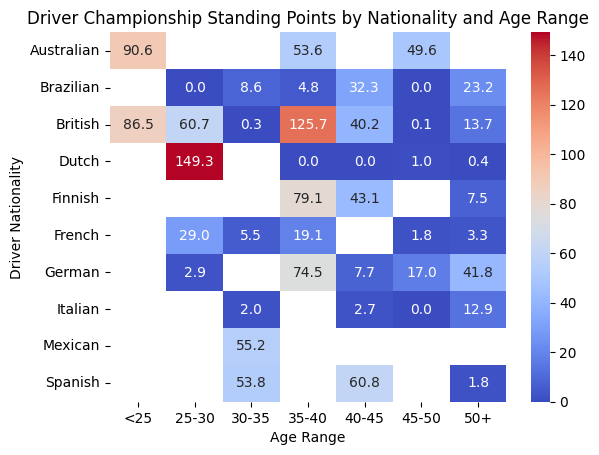

In [ ]:
age_bins = [0, 25, 30, 35, 40, 45, 50, np.inf]
age_labels = ['<25', '25-30', '30-35', '35-40', '40-45', '45-50', '50+']
df['age_range'] = pd.cut(df['driverAge'], bins=age_bins, labels=age_labels)
driver_nationalities = df['driverNationality'].value_counts()[:10].index
#Create a pivot table to calculate mean driver championship standing points by nationality and age range
driver_championships = pd.pivot_table(df[df['driverNationality'].isin(driver_nationalities)], index='driverNationality', columns='age_range', values='driverChampionshipStandingPoints', aggfunc='mean')
sns.heatmap(driver_championships, cmap='coolwarm', annot=True, fmt='.1f')
plt.xlabel('Age Range')
plt.ylabel('Driver Nationality')
plt.title('Driver Championship Standing Points by Nationality and Age Range')
plt.show()

C:\Users\yeshw\AppData\Local\Temp\ipykernel_14284\1681409098.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='constructorName', y='constructorRacePoints', data=data[data['constructorName'].isin(top_constructors)], palette="Set3")


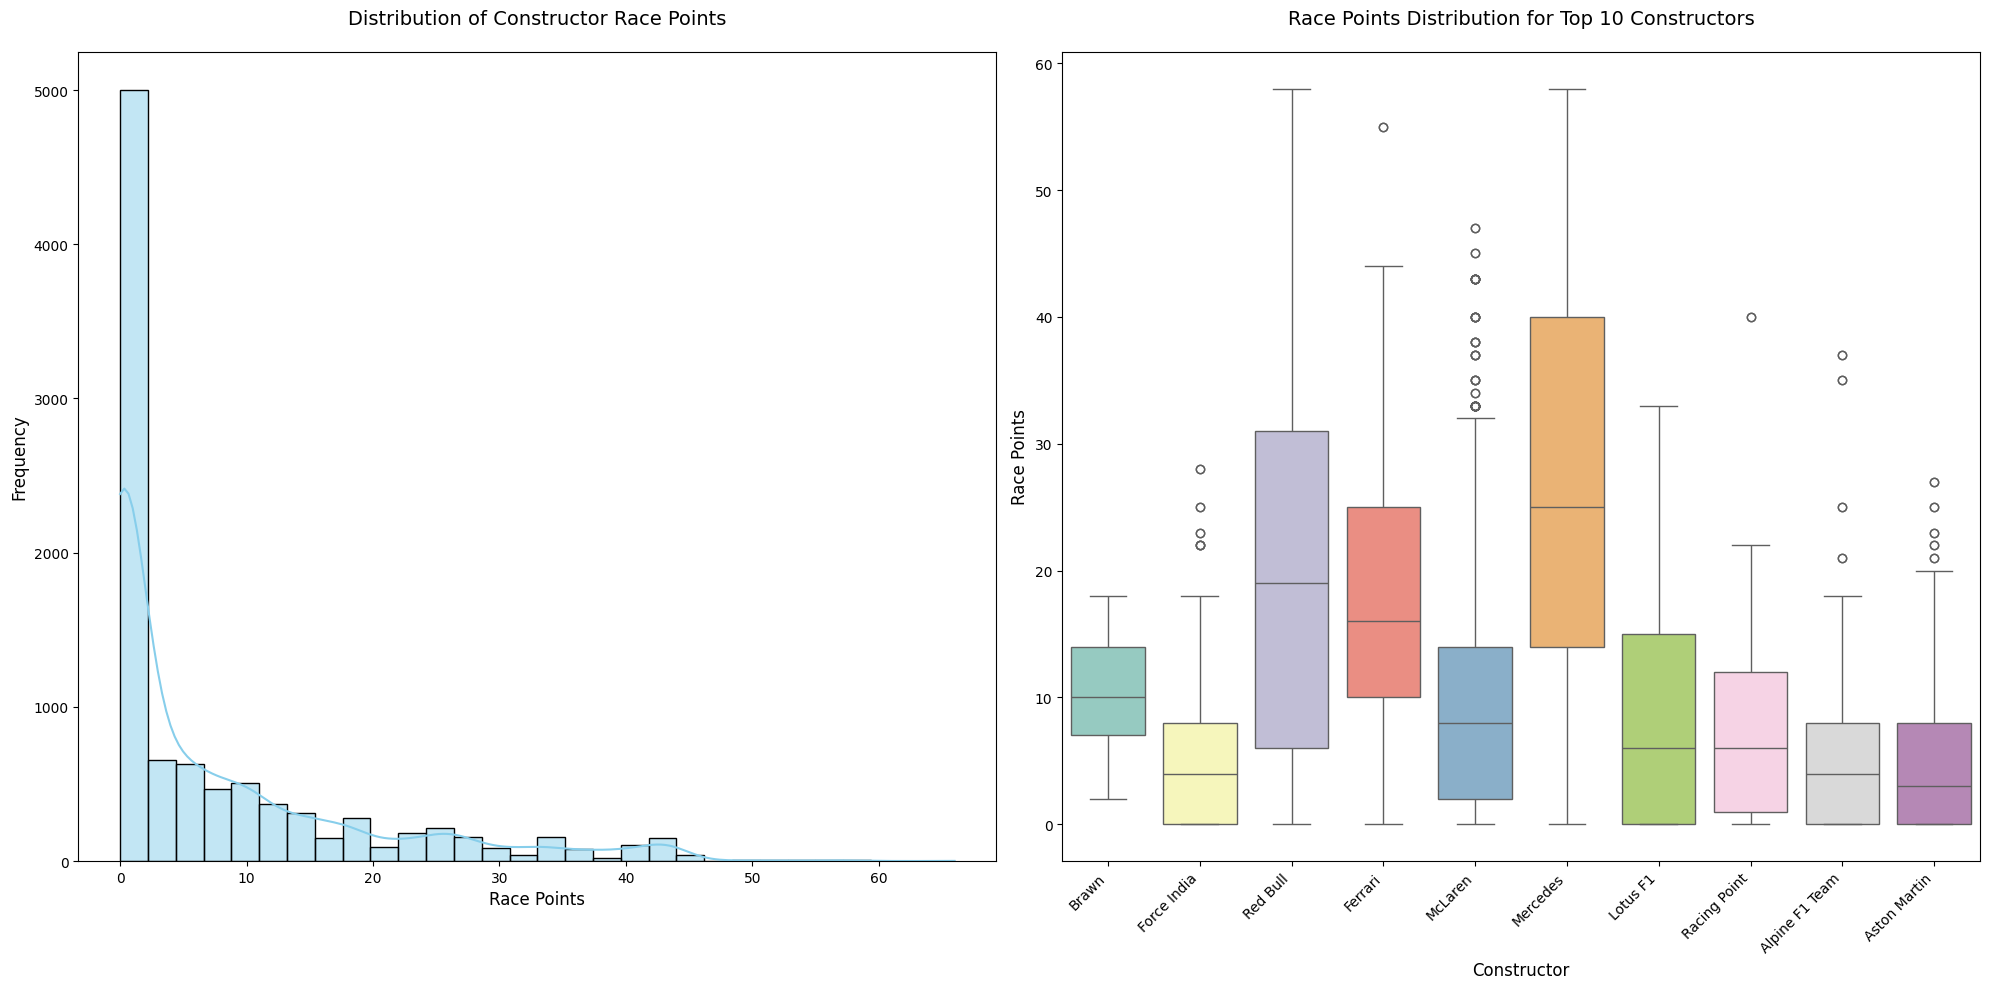

In [59]:
plt.figure(figsize=(20, 10))

# Histogram & KDE of race points
plt.subplot(1, 2, 1)
sns.histplot(data['constructorRacePoints'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Constructor Race Points', fontsize=14, pad=20)
plt.xlabel('Race Points', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Box plot of race points by constructor (for top 10)
plt.subplot(1, 2, 2)
sns.boxplot(x='constructorName', y='constructorRacePoints', data=data[data['constructorName'].isin(top_constructors)], palette="Set3")
plt.title('Race Points Distribution for Top 10 Constructors', fontsize=14, pad=20)
plt.xlabel('Constructor', fontsize=12)
plt.ylabel('Race Points', fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

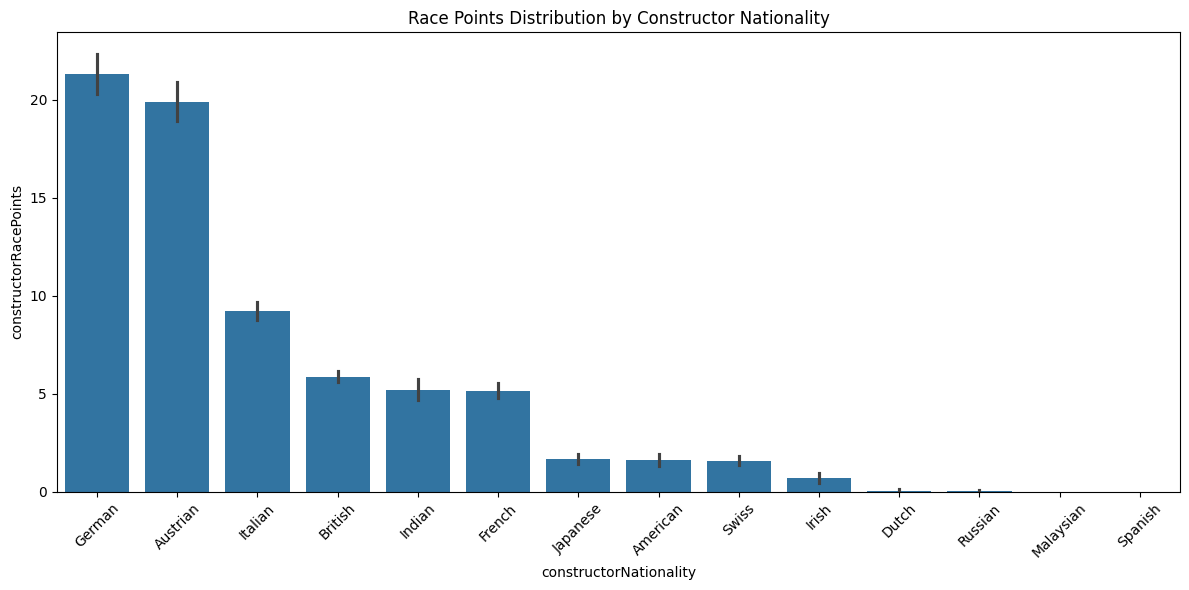

In [66]:
#Constructor Nationality Performance
plt.figure(figsize=(12, 6))
sns.barplot(data=data,
            x='constructorNationality', 
            y='constructorRacePoints',
            order=data.groupby('constructorNationality')['constructorRacePoints']
                  .mean().sort_values(ascending=False).index)
plt.xticks(rotation=45)
plt.title('Race Points Distribution by Constructor Nationality')
plt.tight_layout()
plt.show()

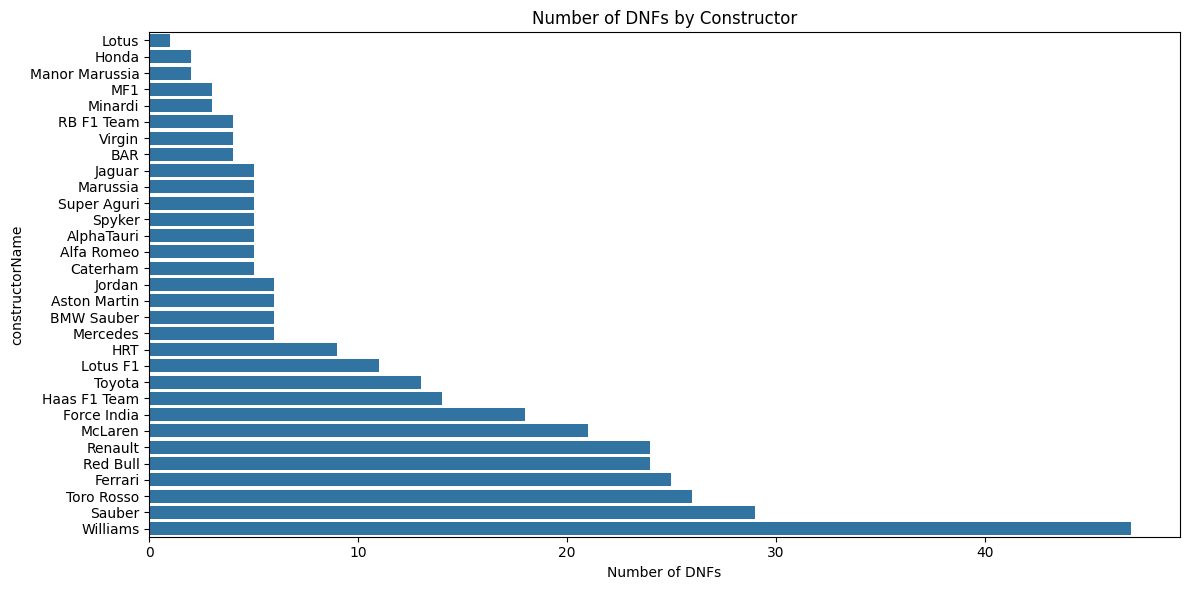

In [67]:
# DNF (Did Not Finish) Analysis
plt.figure(figsize=(12, 6))
dnf_data = (data[data['driverRaceResultStatus'].isin(['Retired', 'Accident', 'Technical'])]
            .groupby('constructorName')['raceId']
            .count()
            .sort_values(ascending=True))

sns.barplot(x=dnf_data.values, y=dnf_data.index)
plt.title('Number of DNFs by Constructor')
plt.xlabel('Number of DNFs')
plt.tight_layout()
plt.show()

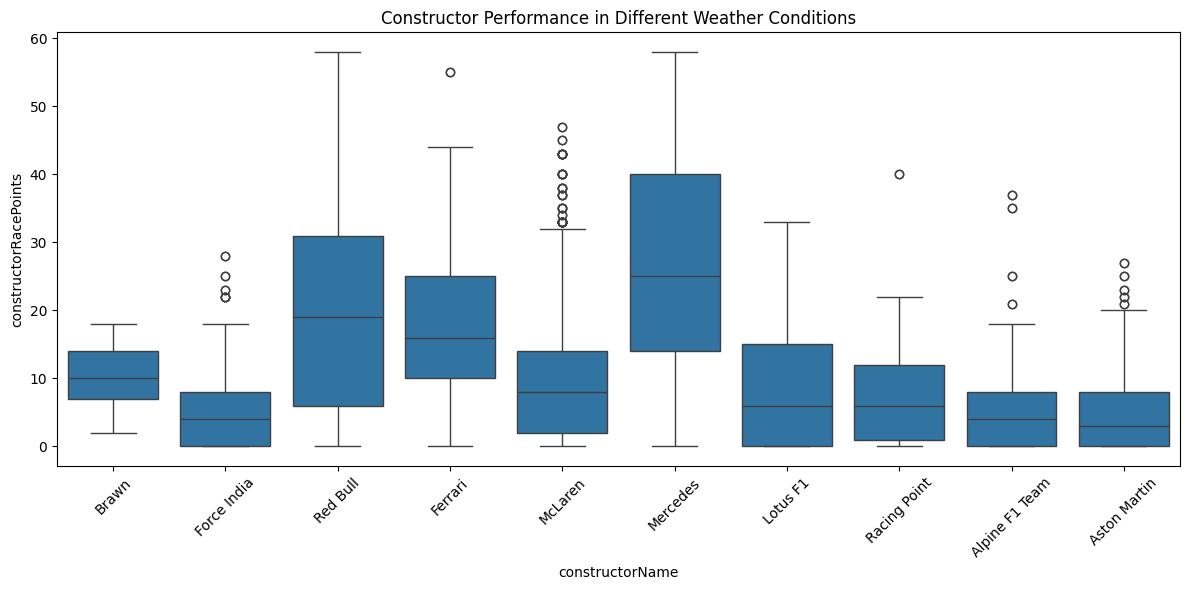

In [73]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[data['constructorName'].isin(top_constructors)],
            x='constructorName', y='constructorRacePoints')
plt.xticks(rotation=45)
plt.title('Constructor Performance in Different Weather Conditions')
plt.tight_layout()
plt.show()

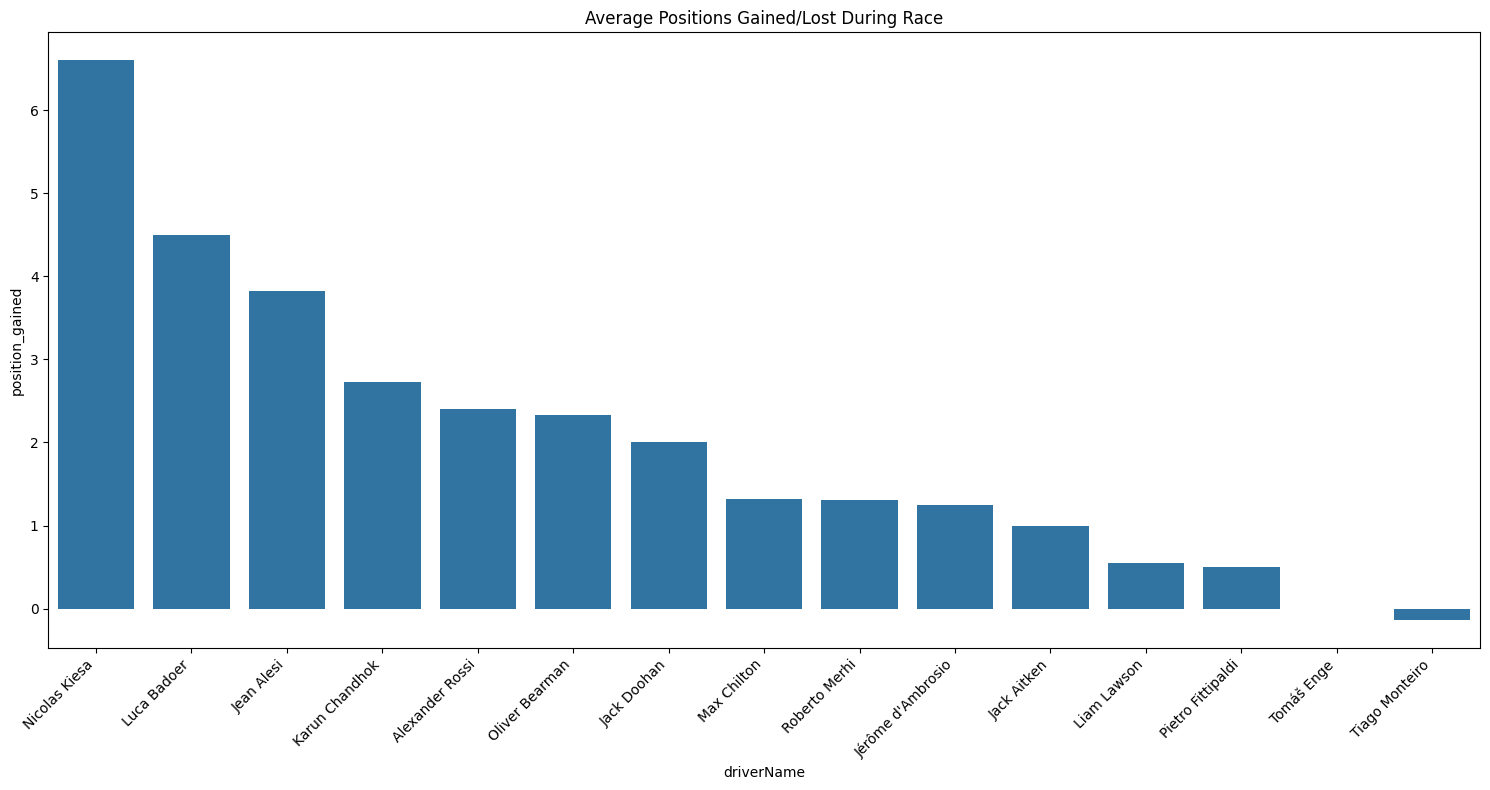

In [76]:
# Position Gain/Loss Analysis
plt.figure(figsize=(15, 8))

# Calculate position gained for each race
data['position_gained'] = data['driverStartGridPos'] - data['driverFinalGridPos']

# Calculate average position gained per driver
position_changes = data.groupby('driverName')['position_gained'].mean().reset_index()

# Create bar plot for top 15 drivers
sns.barplot(data=position_changes.sort_values('position_gained', ascending=False).head(15),
            x='driverName',
            y='position_gained')
plt.title('Average Positions Gained/Lost During Race')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

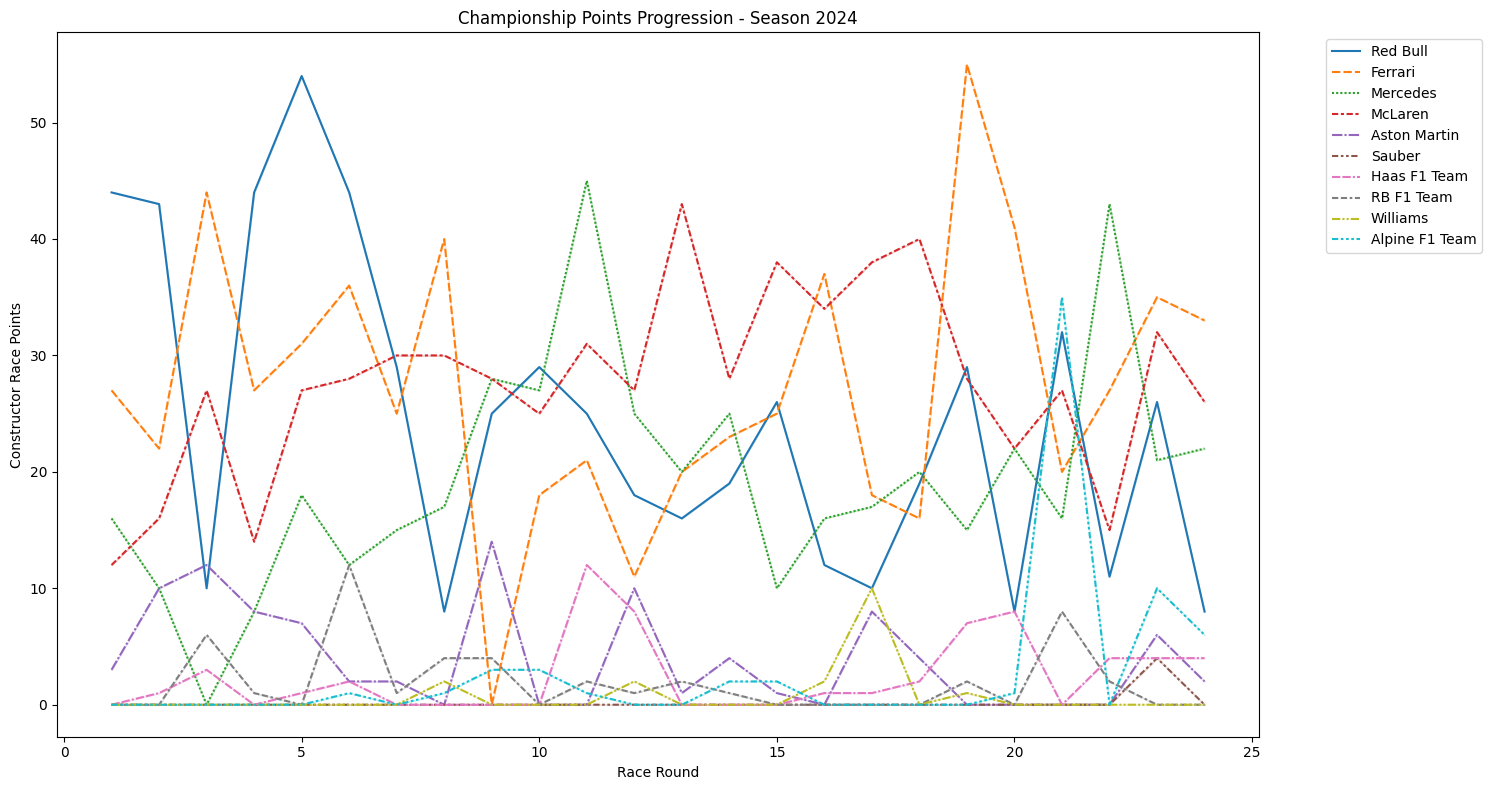

In [78]:
# Championship Points Progression
plt.figure(figsize=(15, 8))
season_progress = data[data['season'] == data['season'].max()]
sns.lineplot(data=season_progress,
            x='raceNumber',
            y='constructorRacePoints',
            hue='constructorName',
            style='constructorName')
plt.title(f'Championship Points Progression - Season {data["season"].max()}')
plt.xlabel('Race Round')
plt.ylabel('Constructor Race Points')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

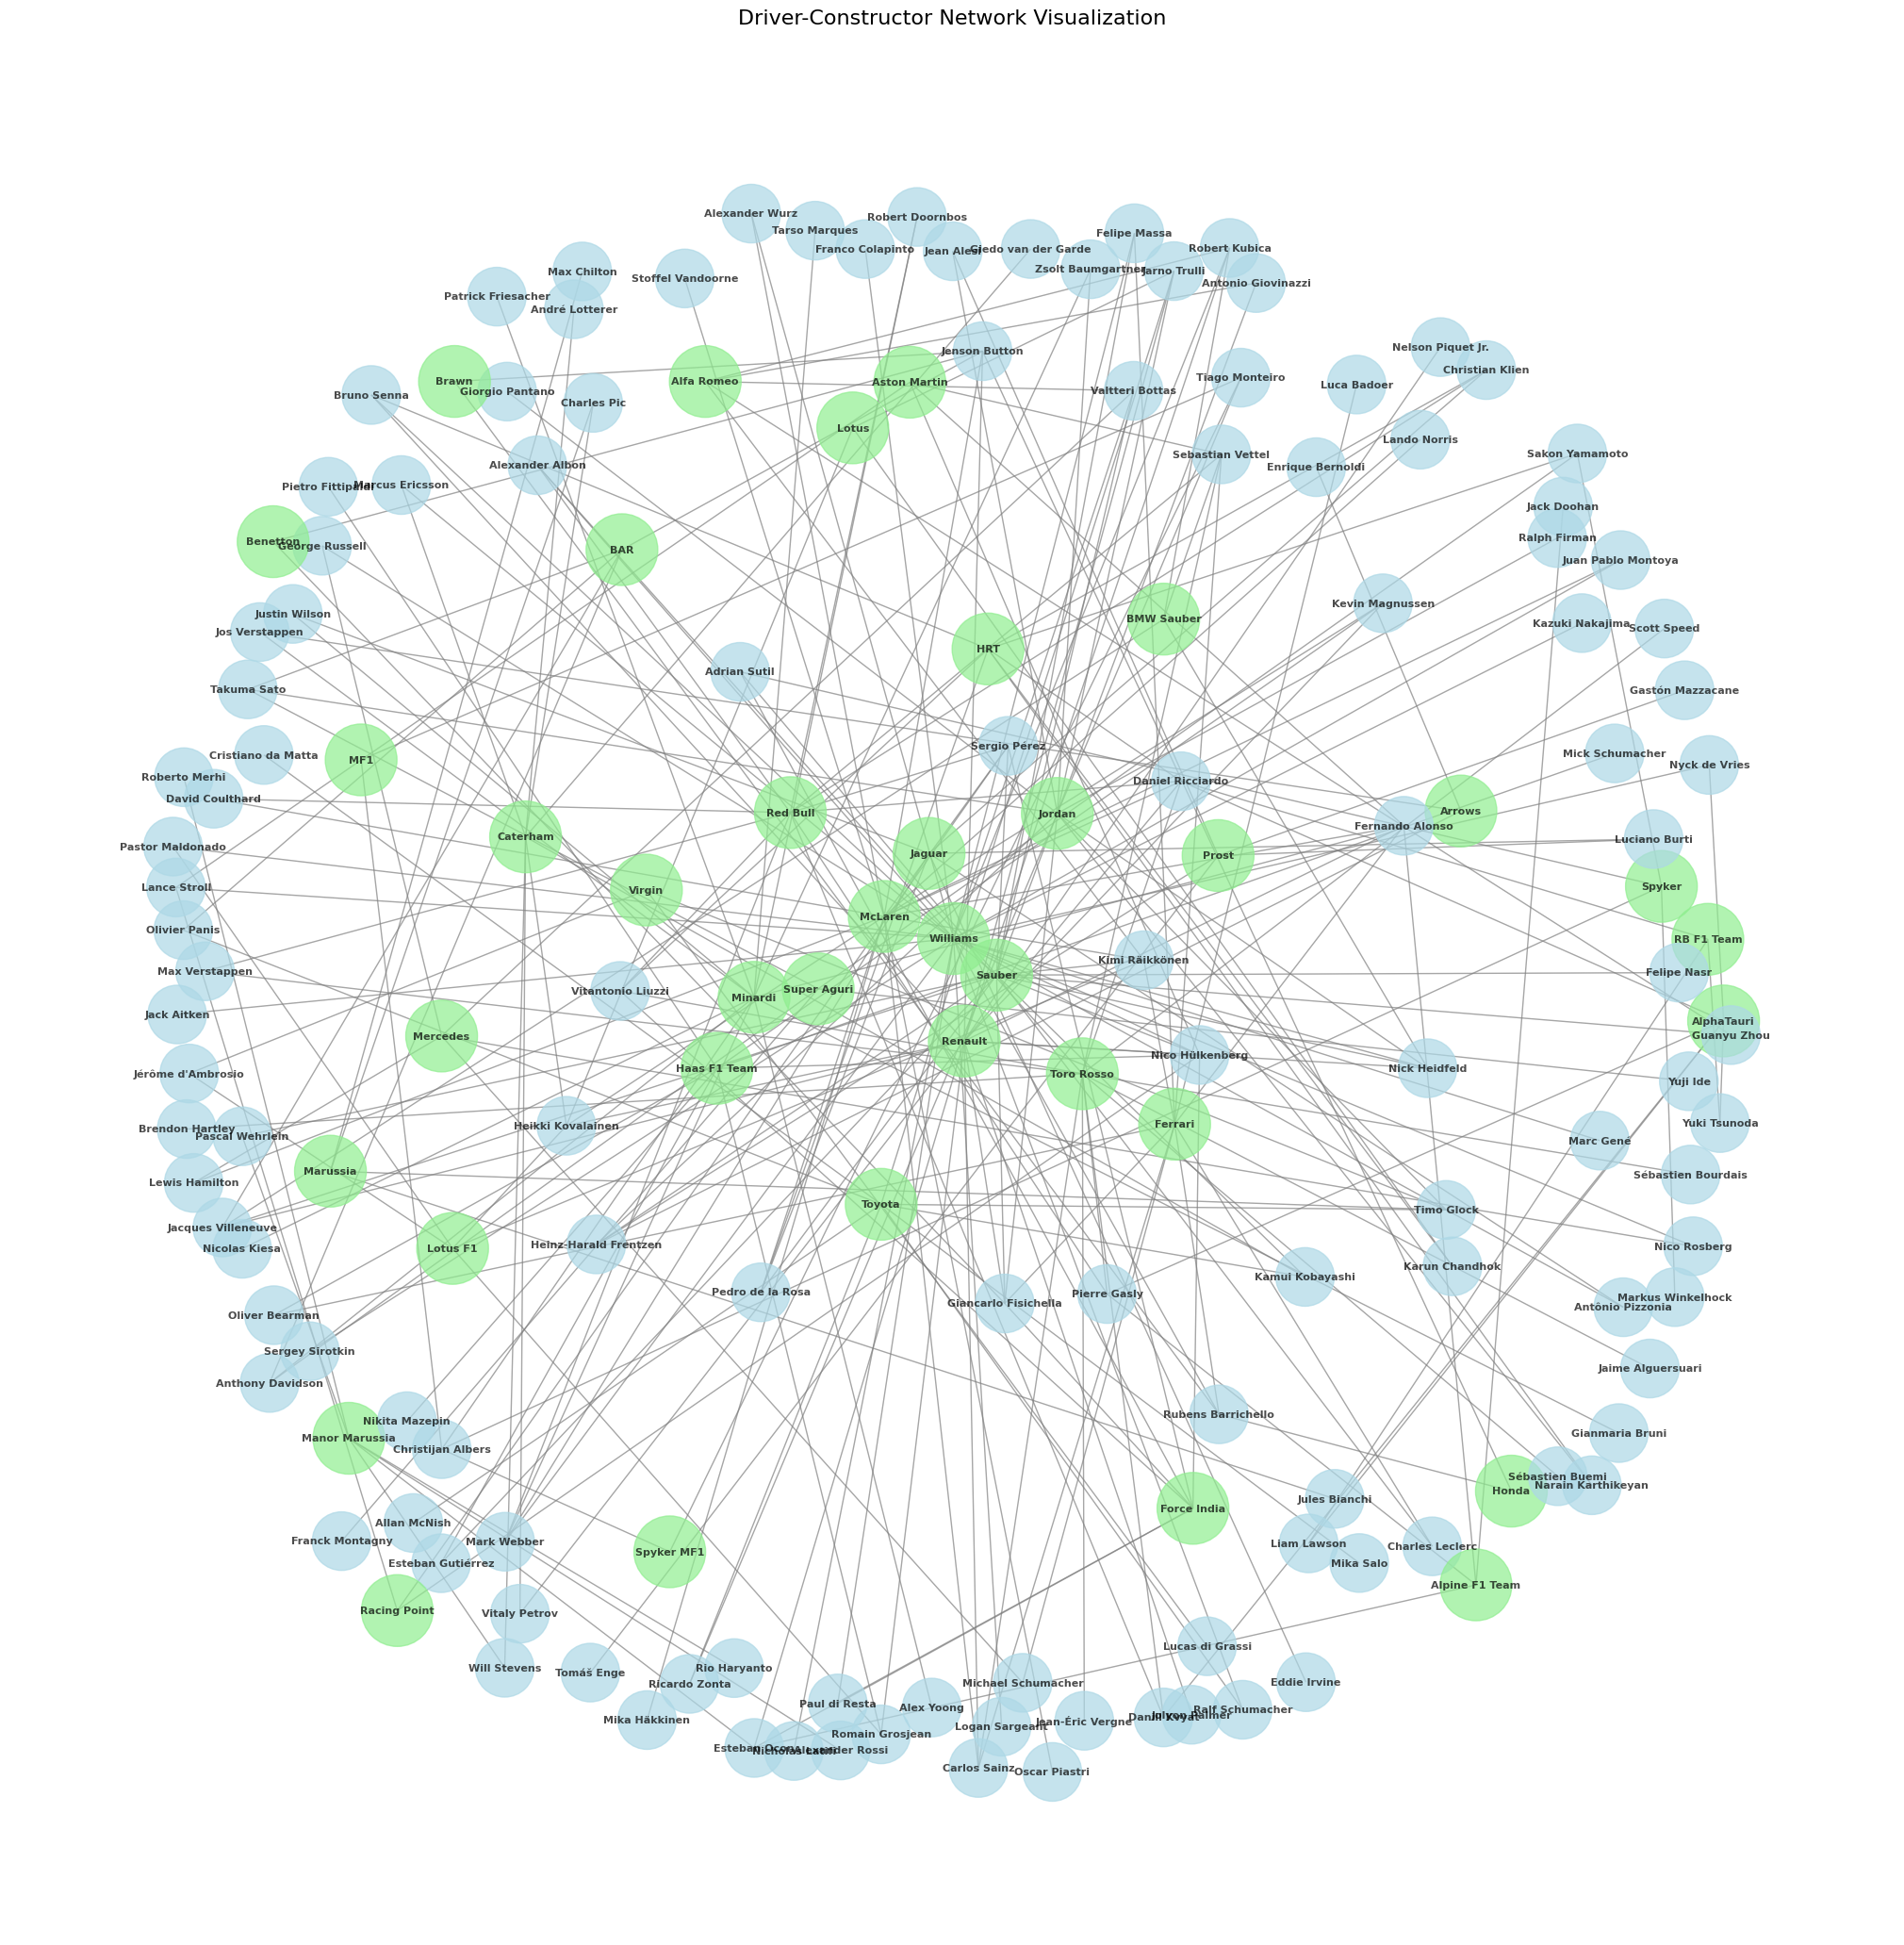

In [81]:
import networkx as nx
# Driver Team Transitions with more styling
plt.figure(figsize=(20, 20))
G = nx.from_pandas_edgelist(
    data.groupby(['driverName', 'constructorName']).size().reset_index(),
    'driverName',
    'constructorName',
    create_using=nx.Graph()
)

# Calculate node sizes based on degree (number of connections)
driver_nodes = [node for node in G.nodes() if node in data['driverName'].unique()]
team_nodes = [node for node in G.nodes() if node in data['constructorName'].unique()]

# Set different colors for drivers and teams
node_colors = ['lightblue' if node in driver_nodes else 'lightgreen' for node in G.nodes()]

# Set node sizes based on type (larger for teams, smaller for drivers)
node_sizes = [3000 if node in team_nodes else 2000 for node in G.nodes()]

# Use spring layout for better visualization
pos = nx.spring_layout(G, k=1, iterations=50)

# Draw the network
nx.draw(G, pos,
        with_labels=True,
        node_color=node_colors,
        node_size=node_sizes,
        font_size=8,
        font_weight='bold',
        edge_color='gray',
        alpha=0.7)

plt.title('Driver-Constructor Network Visualization', fontsize=16, pad=20)
plt.show()

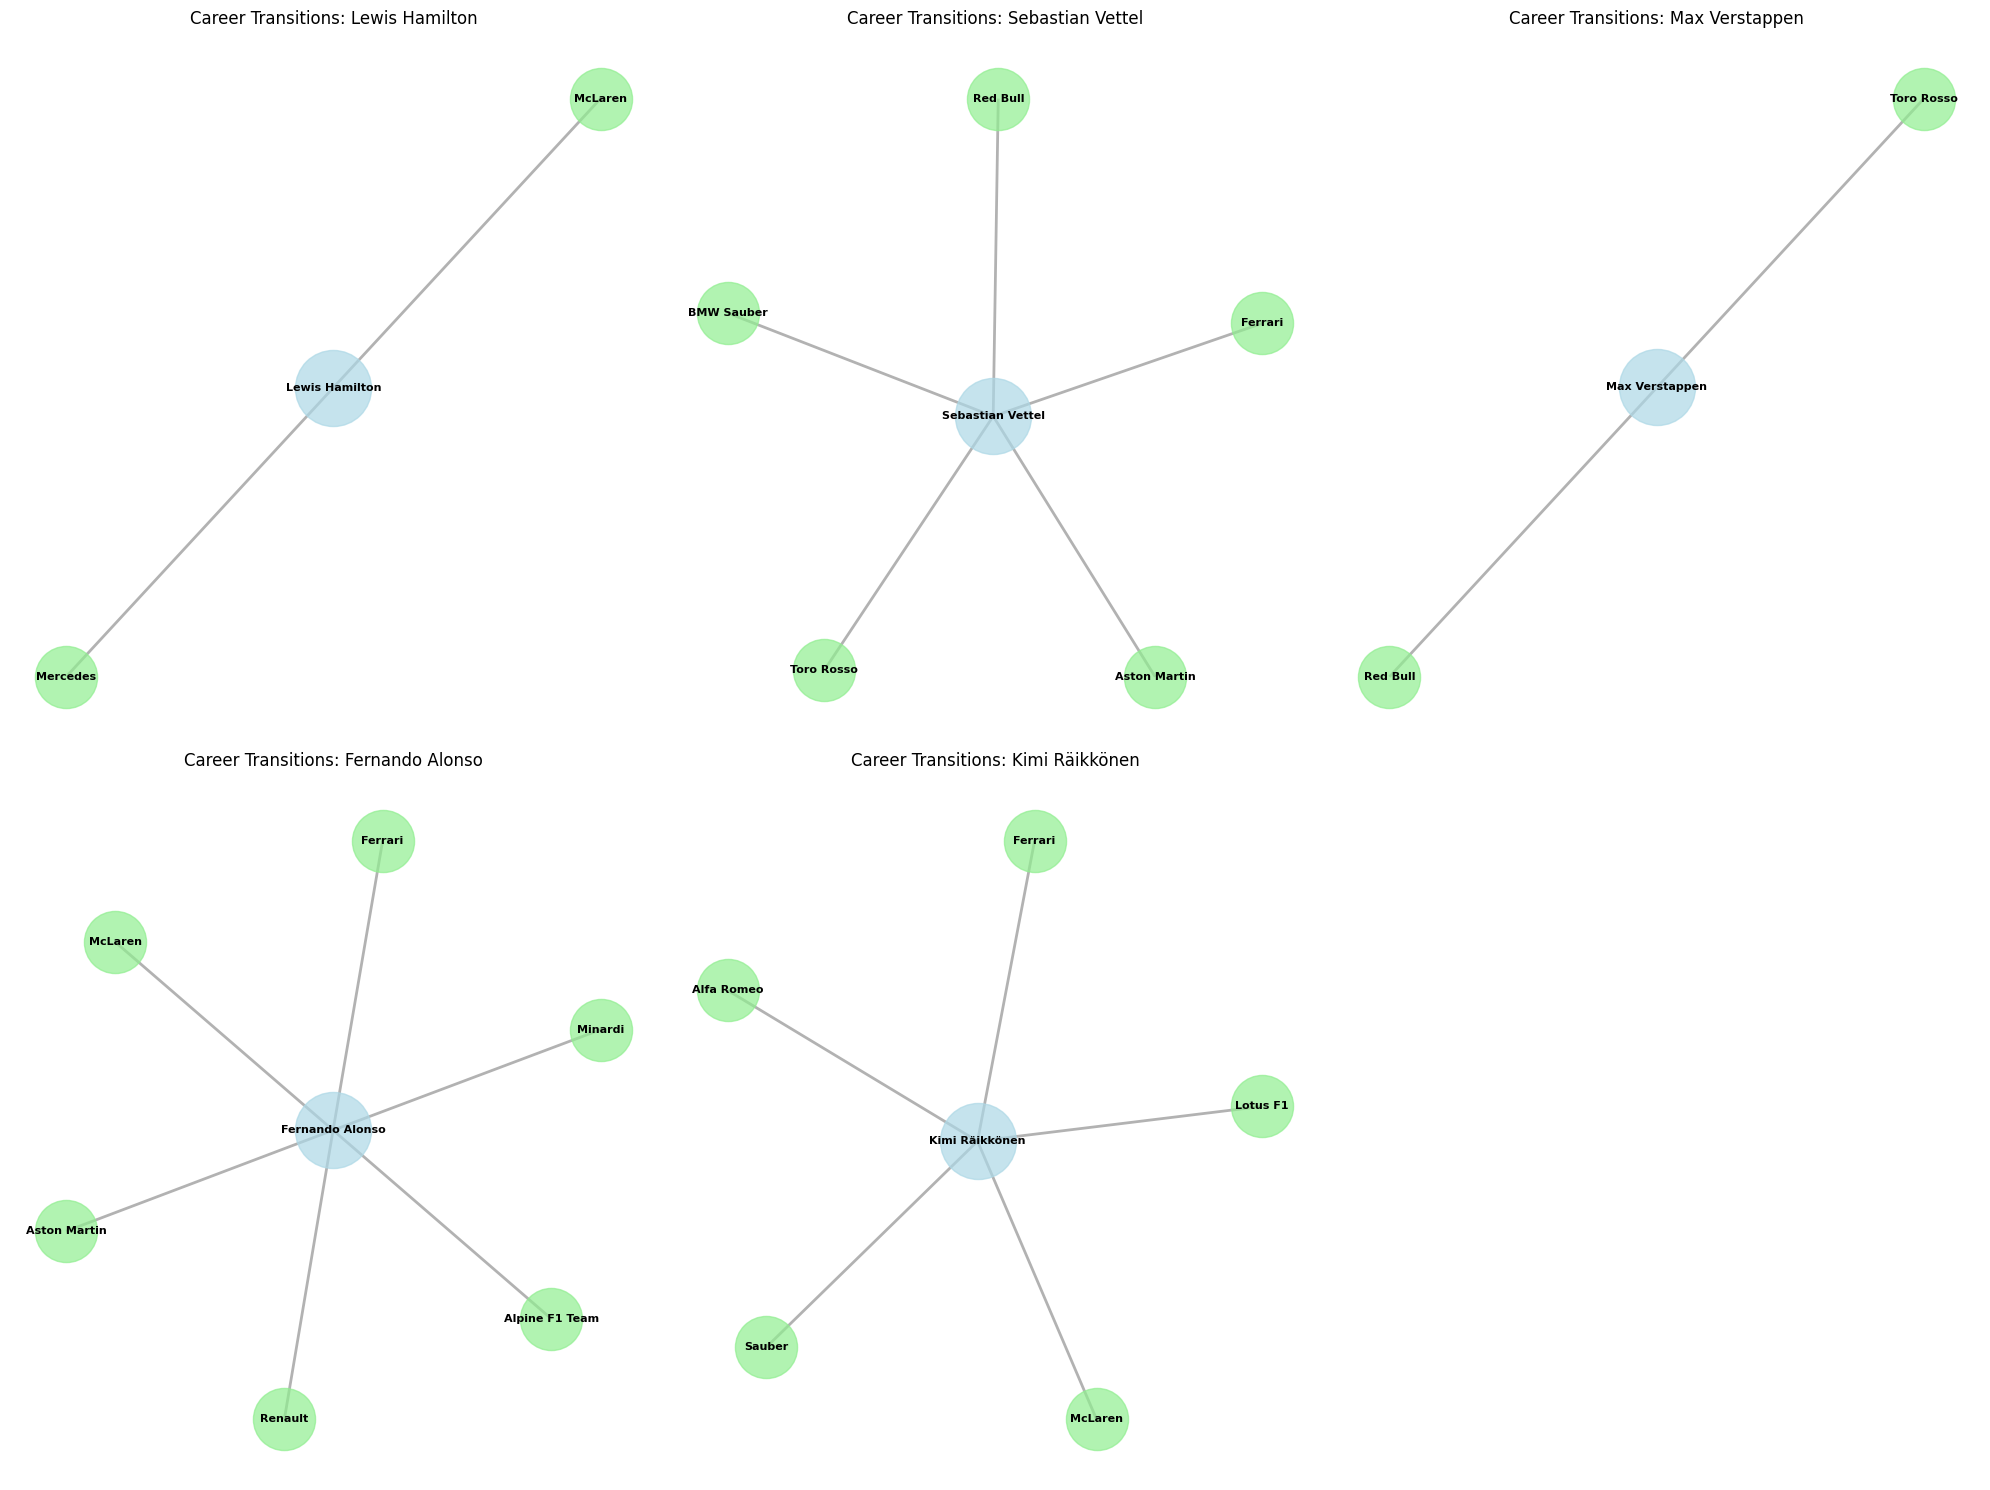


Career Statistics for Lewis Hamilton:
                raceId driverRacePoints season      
                 count             mean    min   max
constructorName                                     
McLaren            110             8.30   2007  2012
Mercedes           246            15.88   2013  2024

Career Statistics for Sebastian Vettel:
                raceId driverRacePoints season      
                 count             mean    min   max
constructorName                                     
Aston Martin        42             1.90   2021  2022
BMW Sauber           1             1.00   2007  2007
Ferrari            119            11.76   2015  2020
Red Bull           113            13.96   2009  2014
Toro Rosso          25             1.60   2007  2008

Career Statistics for Max Verstappen:
                raceId driverRacePoints season      
                 count             mean    min   max
constructorName                                     
Red Bull           186           

In [84]:
import networkx as nx
import matplotlib.pyplot as plt

def create_driver_network(data, driver_name, ax):
    """Create network visualization for a single driver's career with timeline"""
    
    # Filter and sort data for the specific driver
    driver_data = (data[data['driverName'] == driver_name]
                  .sort_values('season')
                  .drop_duplicates(['season', 'constructorName']))
    
    # Create graph
    G = nx.Graph()
    
    # Add driver node (center)
    G.add_node(driver_name, node_type='driver')
    
    # Add constructor nodes and edges with season information
    edge_labels = {}
    for _, row in driver_data.iterrows():
        constructor = row['constructorName']
        season = row['season']
        if constructor not in G.nodes():
            G.add_node(constructor, node_type='constructor')
            G.add_edge(driver_name, constructor)
            edge_labels[(driver_name, constructor)] = str(season)
    
    # Set layout (circular for better visualization)
    pos = nx.spring_layout(G, k=1, iterations=50)
    
    # Draw constructor nodes
    constructor_nodes = [node for node in G.nodes() if G.nodes[node]['node_type'] == 'constructor']
    nx.draw_networkx_nodes(G, pos, 
                          nodelist=constructor_nodes,
                          node_color='lightgreen',
                          node_size=2000,
                          alpha=0.7,
                          ax=ax)
    
    # Draw driver node (center)
    nx.draw_networkx_nodes(G, pos,
                          nodelist=[driver_name],
                          node_color='lightblue',
                          node_size=3000,
                          alpha=0.7,
                          ax=ax)
    
    # Draw edges
    nx.draw_networkx_edges(G, pos, 
                          edge_color='gray',
                          width=2,
                          alpha=0.6,
                          ax=ax)
    
    # Add node labels
    nx.draw_networkx_labels(G, pos, 
                           font_size=8,
                           font_weight='bold',
                           ax=ax)
    
    # Add edge labels (seasons)
    nx.draw_networkx_edge_labels(G, pos,
                                edge_labels=edge_labels,
                                font_size=7)
    
    ax.set_title(f"Career Transitions: {driver_name}", fontsize=12, pad=10)
    ax.axis('off')

# Get top drivers
top_drivers = (data.groupby('driverName')['driverRacePoints']
               .sum()
               .sort_values(ascending=False)
               .head(5)
               .index)

# Create subplots for all drivers
fig, axes = plt.subplots(2, 3, figsize=(20, 15))
axes = axes.flatten()

# Create network diagrams for each driver
for idx, driver in enumerate(top_drivers):
    create_driver_network(data, driver, axes[idx])

# Remove empty subplot if any
if len(top_drivers) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

# Print career statistics
for driver in top_drivers:
    print(f"\nCareer Statistics for {driver}:")
    driver_stats = (data[data['driverName'] == driver]
                   .groupby('constructorName')
                   .agg({
                       'raceId': 'count',
                       'driverRacePoints': 'mean',
                       'season': ['min', 'max']
                   })
                   .round(2))
    print(driver_stats)

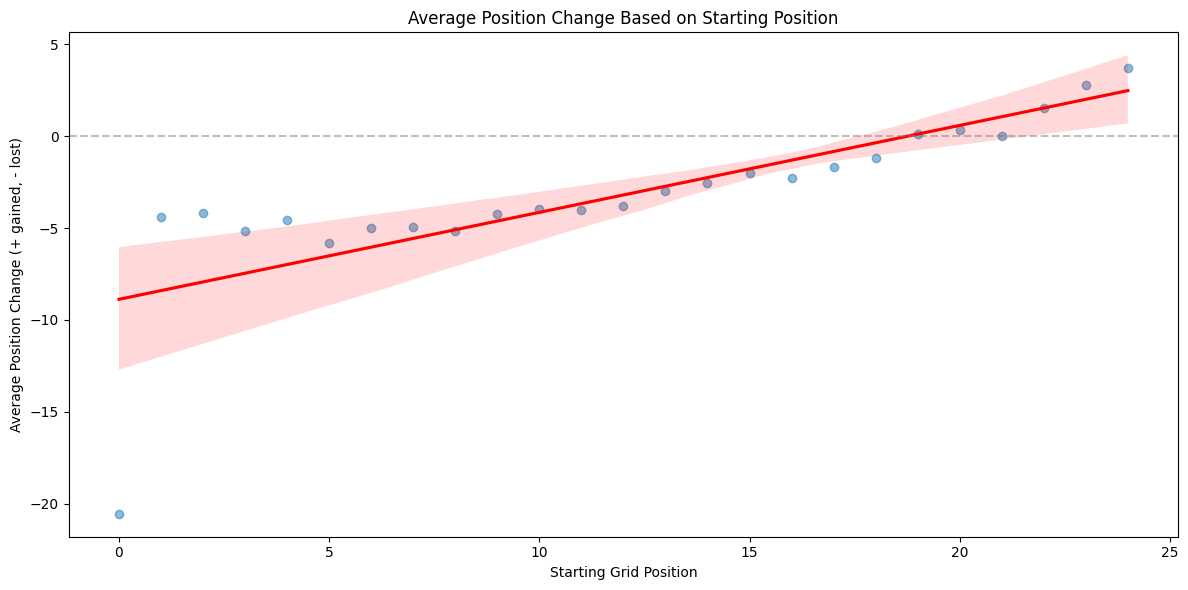

In [90]:
# Position change visualization (Start vs Final position)
plt.figure(figsize=(12, 6))

# Calculate position change
data['position_change'] = data['driverStartGridPos'] - data['driverFinalGridPos']

# Group by starting position and calculate average position change
pos_analysis = data.groupby('driverStartGridPos')['position_change'].mean().reset_index()

sns.regplot(data=pos_analysis,
           x='driverStartGridPos',
           y='position_change',
           scatter_kws={'alpha':0.5},
           line_kws={'color': 'red'})

plt.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
plt.title('Average Position Change Based on Starting Position')
plt.xlabel('Starting Grid Position')
plt.ylabel('Average Position Change (+ gained, - lost)')
plt.tight_layout()
plt.show()

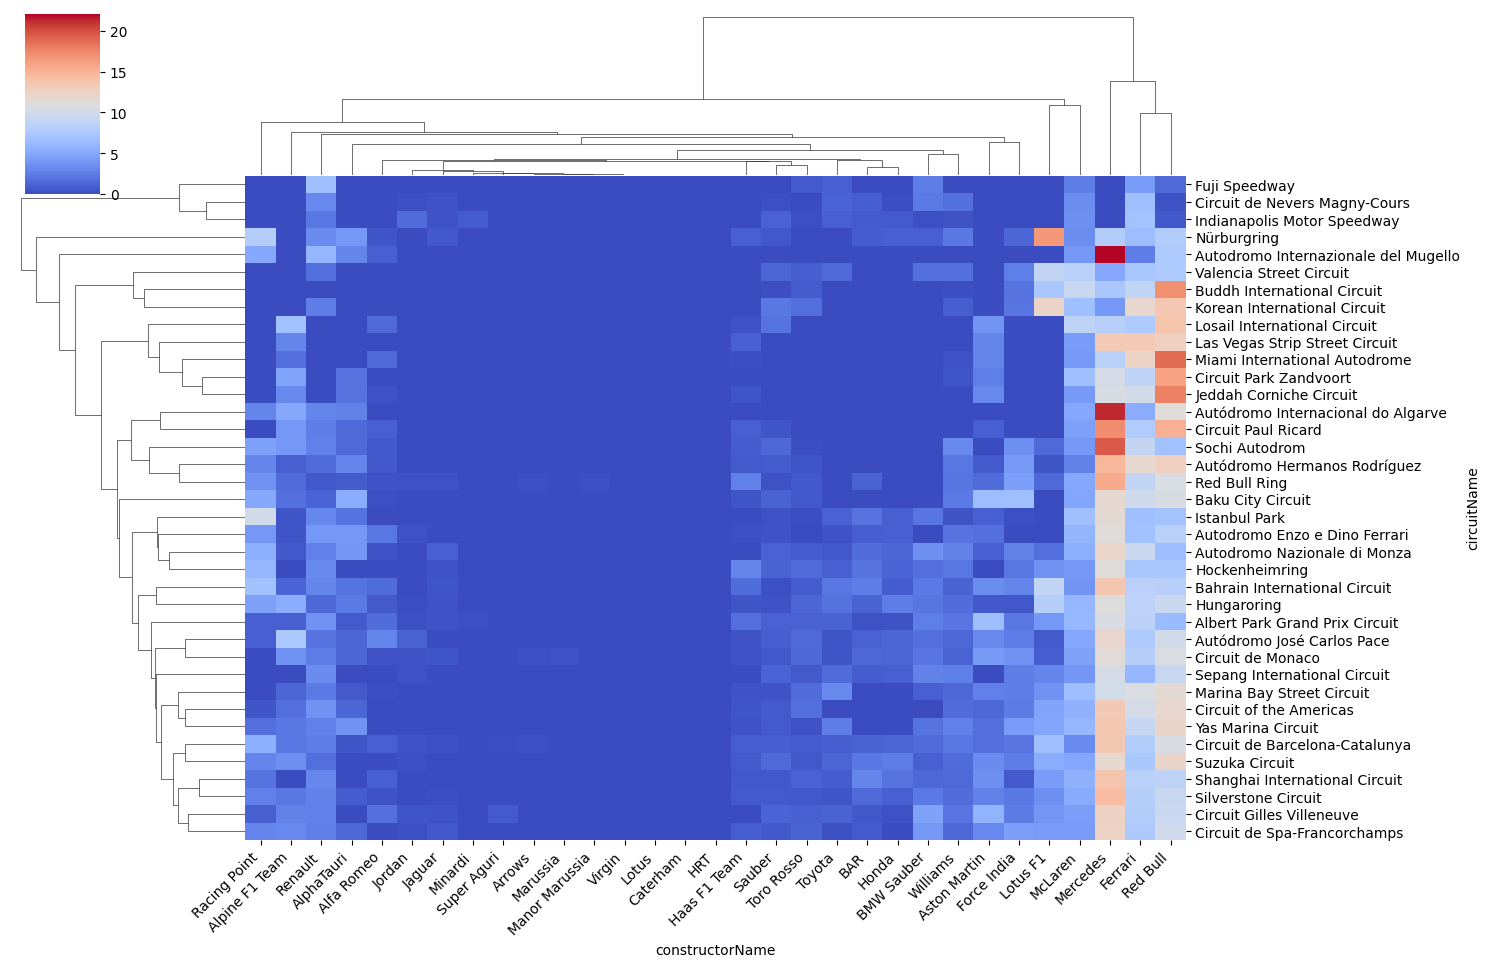

In [101]:
# Circuit performance analysis
circuit_analysis = data.groupby(['circuitName', 'constructorName'])['driverRacePoints'].mean().reset_index()

# Create pivot table with filtered data
circuit_pivot = circuit_analysis.pivot(index='circuitName', 
                                     columns='constructorName', 
                                     values='driverRacePoints')

# Filter constructors with significant presence
min_races = 50  # Minimum number of races for a constructor to be included
constructor_counts = data.groupby('constructorName').size()
significant_constructors = constructor_counts[constructor_counts >= min_races].index

# Filter circuits with sufficient data
circuit_counts = data.groupby('circuitName').size()
significant_circuits = circuit_counts[circuit_counts >= 10].index

# Filter pivot table
filtered_pivot = circuit_pivot.loc[significant_circuits, significant_constructors]

# Fill any remaining NaN values with 0
filtered_pivot = filtered_pivot.fillna(0)

# Create clustermap
g = sns.clustermap(filtered_pivot,
                   cmap='coolwarm',
                   figsize=(15, 10),
                   yticklabels=True,
                   xticklabels=True)

# Rotate x-axis labels for better readability
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=45, ha='right')

plt.show()

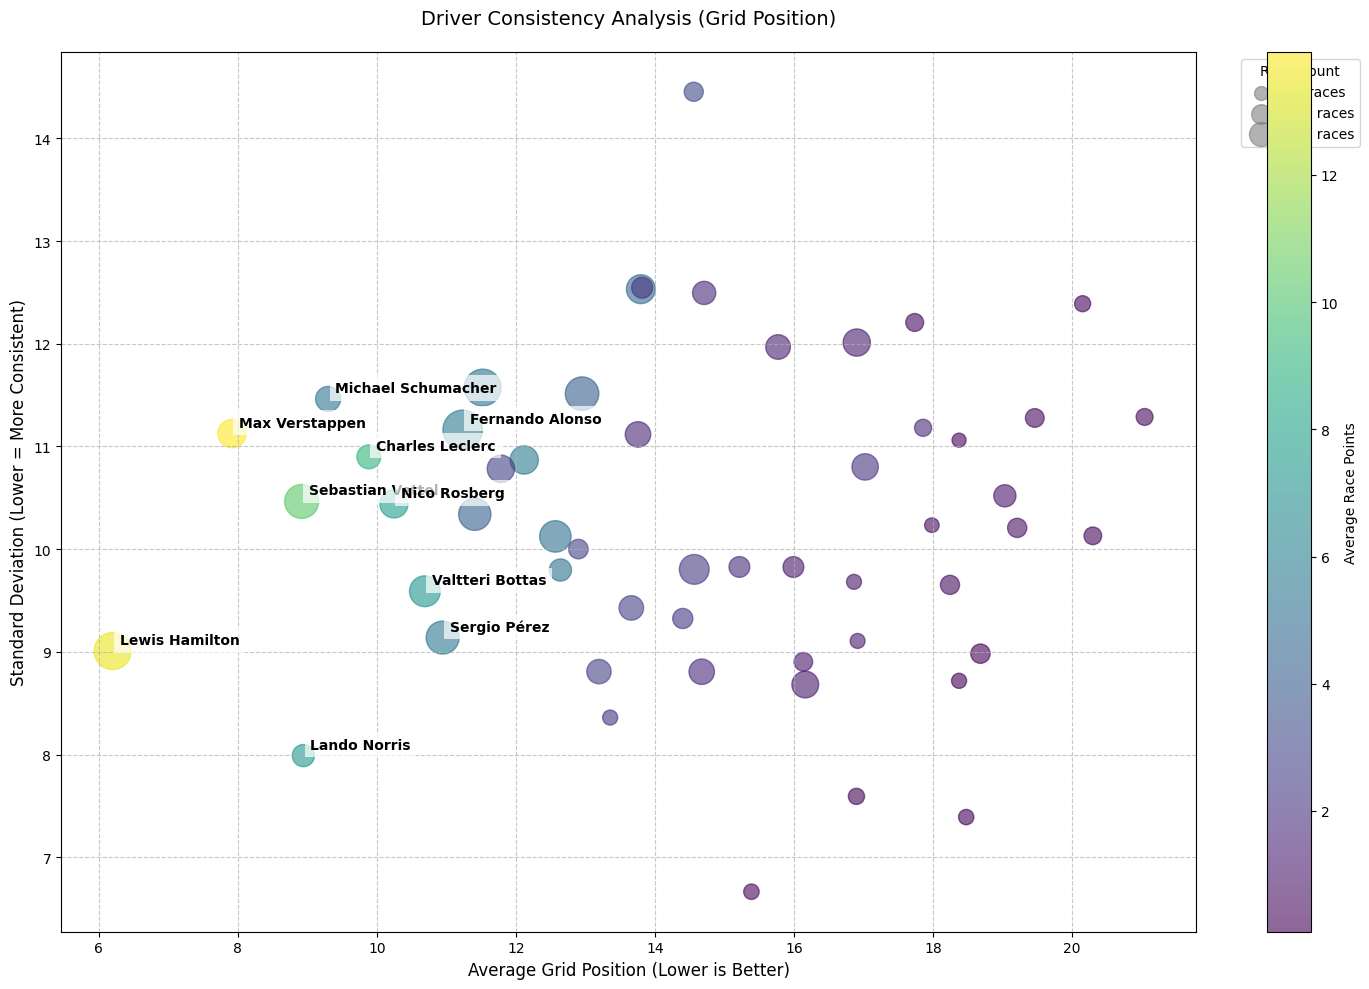


Top 10 Most Consistent Drivers:
             driverName  grid_pos_mean  grid_pos_std  points_mean
60       Lewis Hamilton           6.20          9.01        13.54
71       Max Verstappen           7.92         11.13        13.94
106    Sebastian Vettel           8.92         10.46        10.33
59         Lando Norris           8.95          7.99         7.42
72   Michael Schumacher           9.30         11.46         5.45
13      Charles Leclerc           9.89         10.90         9.15
81         Nico Rosberg          10.25         10.44         7.74
117     Valtteri Bottas          10.69          9.59         7.24
108        Sergio Pérez          10.95          9.14         5.60
27      Fernando Alonso          11.24         11.16         5.76


In [105]:
# Calculate consistency metrics with proper column names
driver_consistency = data.groupby('driverName').agg({
    'driverFinalGridPos': ['mean', 'std'],
    'driverRacePoints': ['mean', 'count']
}).reset_index()

# Rename columns for easier access
driver_consistency.columns = ['driverName', 
                            'grid_pos_mean', 'grid_pos_std',
                            'points_mean', 'race_count']

# Only include drivers with minimum 50 races
driver_consistency = driver_consistency[driver_consistency['race_count'] > 50]

plt.figure(figsize=(15, 10))

# Create scatter plot
scatter = plt.scatter(driver_consistency['grid_pos_mean'],
                     driver_consistency['grid_pos_std'],
                     alpha=0.6,
                     s=driver_consistency['race_count'] * 2,
                     c=driver_consistency['points_mean'],
                     cmap='viridis')

# Add colorbar
plt.colorbar(scatter, label='Average Race Points')

# Annotate top performers
top_drivers = driver_consistency.nsmallest(10, 'grid_pos_mean')
for _, row in top_drivers.iterrows():
    plt.annotate(row['driverName'], 
                (row['grid_pos_mean'], row['grid_pos_std']),
                xytext=(5, 5),
                textcoords='offset points',
                fontsize=10,
                fontweight='bold',
                bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

# Customize plot
plt.title('Driver Consistency Analysis (Grid Position)', fontsize=14, pad=20)
plt.xlabel('Average Grid Position (Lower is Better)', fontsize=12)
plt.ylabel('Standard Deviation (Lower = More Consistent)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Add legend for bubble size
sizes = [50, 100, 150]
labels = ['50 races', '100 races', '150 races']
legend_elements = [plt.scatter([], [], s=s*2, c='gray', alpha=0.6, label=l) 
                  for s, l in zip(sizes, labels)]
plt.legend(handles=legend_elements, title='Race Count', 
          loc='upper right', bbox_to_anchor=(1.15, 1))

plt.tight_layout()
plt.show()

# Print top 10 most consistent drivers
print("\nTop 10 Most Consistent Drivers:")
print(top_drivers[['driverName', 'grid_pos_mean', 'grid_pos_std', 'points_mean']].round(2))